In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("dataset_covid.xlsx",
     engine='openpyxl')
#pd.set_option("display.max_rows",111)
#pd.set_option("display.max_column",111)

# EDA

<h2><b><u> Basic checklist: </h2></b></u>
<ol>
    <li><b>target variable</b> SARS-Cov-2 exam result </li>
    <li>5644 lines and 111 cols</li>
    <li>37 categorical 4 int and 70 continuous variables</li>
    <li> <b>missing values analysis</b>: many NAN more than 50% of features are 90% NAN
    2 groups==> 76% NAN tests and 89% NAN blood levelsµ</li>
    </ol>
<h2><b><u> Core Ananlysis: </h2></b></u>  
<ol> 
    <li> new shape after intial cleaning (5644,38)</li>
    <li>imbalanced data 10% positive  </li>
    <li><h4><b> significance of variables :</h4></b>
    most of the features have a normal distribution except some variables with skewed ones like Eosinophils and basonophils </li>
    <li>age features has clearly been processed</li>
    <li> rhinovirus has a high positive rate</li>
    <b>Rel target/features</b>
    <li>-platelets,leukocytes,monocytes might be linked with covid-19</li>
    <li> young people are less likely to be contaminated (hypothesis testing)</li>
    <li> extremely rare to have covid  and another virus except for <i><b>Rhinovirus</i></b>+ drop parainfluenza2 (only has undetected)</li>
    <li> having rhinovirus ==> negative covid-19 (hypothesis testing)</li>
    <li>no correlation between age and blood variables</li>
    <li>bad sensitivity for rapid tests</li>
    <li> blood levels between sick and not_sick differ in lymphocytes</li>
    <li>people in intensive care have different level of lymphocytes</li>
    </ol>
    <b>NaN analyse : test-feats : 1350(92/8), blood-feats : 600(87/13), both : 90%</b>
    <b> Hypothesis testing</b><br>
    -individuals who tested positive have different levels of platlets, leukocytes and monocytes===> rejected<br>  
    -sick individuls have different blood levels===> accepted<br>
    -having rhinovirus ==> negative covid19 test===> rejected

In [245]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [246]:
data.shape

(5644, 111)

In [247]:
data.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  ...  Hb saturation (arterial blood gases)  \
count  6.020000e+02  ...                          2.700000e+01   
mean  -7.866736e-09  ...                         -1.379737e-10   
std    1.000832e+00  ...                          1.019049e+00   
min   -1.865070e+00  ...                         -1.999560e+00   
25%   -7.307069e-01  ...                         -1.122574e+00   
50%   -1.426696e-02  ...                          2.677689e-01   
75%    5.976919e-01  ...                          7.383496e-01   
max    3.764100e+00  ...                          1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.416397e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.236524e+00   

       Base excess (arterial blood gas analysis)  \
count                               2.700000e+01   
mean                               -1.655685e-09   
std                                 1.019049e+00   
min                                -3.082674e+00   
25%                                -3.308668e-01   
50%     

In [3]:
df=data.copy()


In [4]:
pd.set_option("display.max_rows",111)
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [5]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [6]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

<AxesSubplot:>

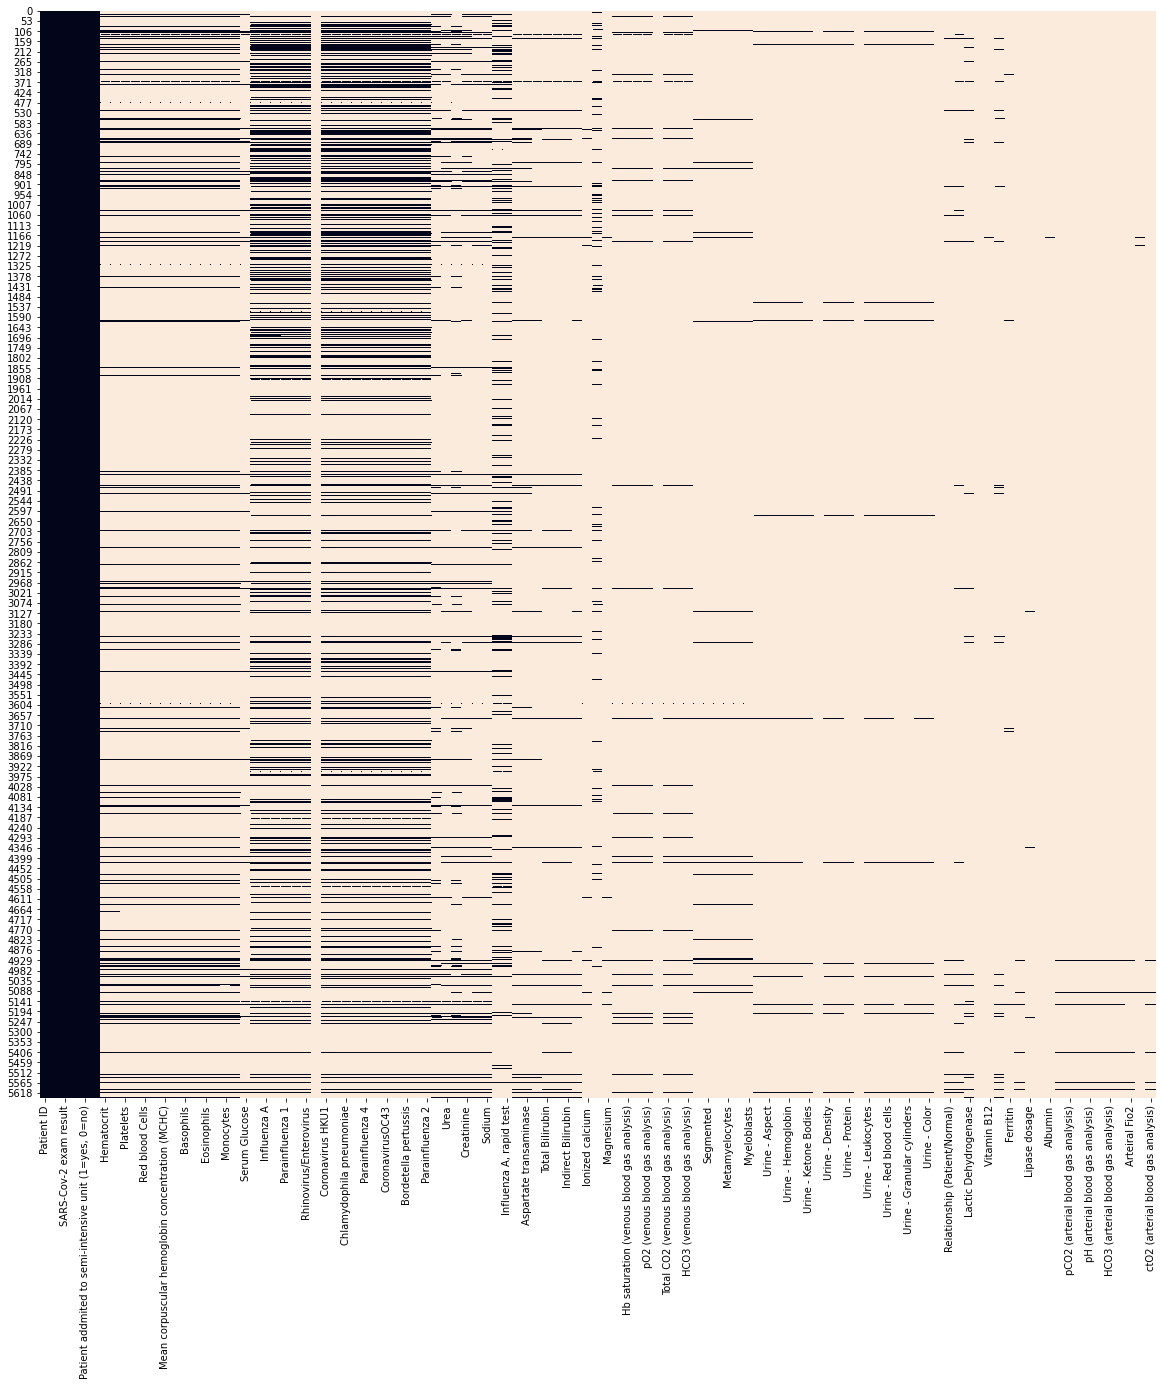

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(),cbar=False)

In [7]:
#we eliminate features with more than 90% of missing values
missing_rate_cond=df.isna().sum()/df.shape[0]<0.9
df=df[df.columns[missing_rate_cond]]
print(f'new shape= {df.shape}')

new shape= (5644, 39)


<AxesSubplot:>

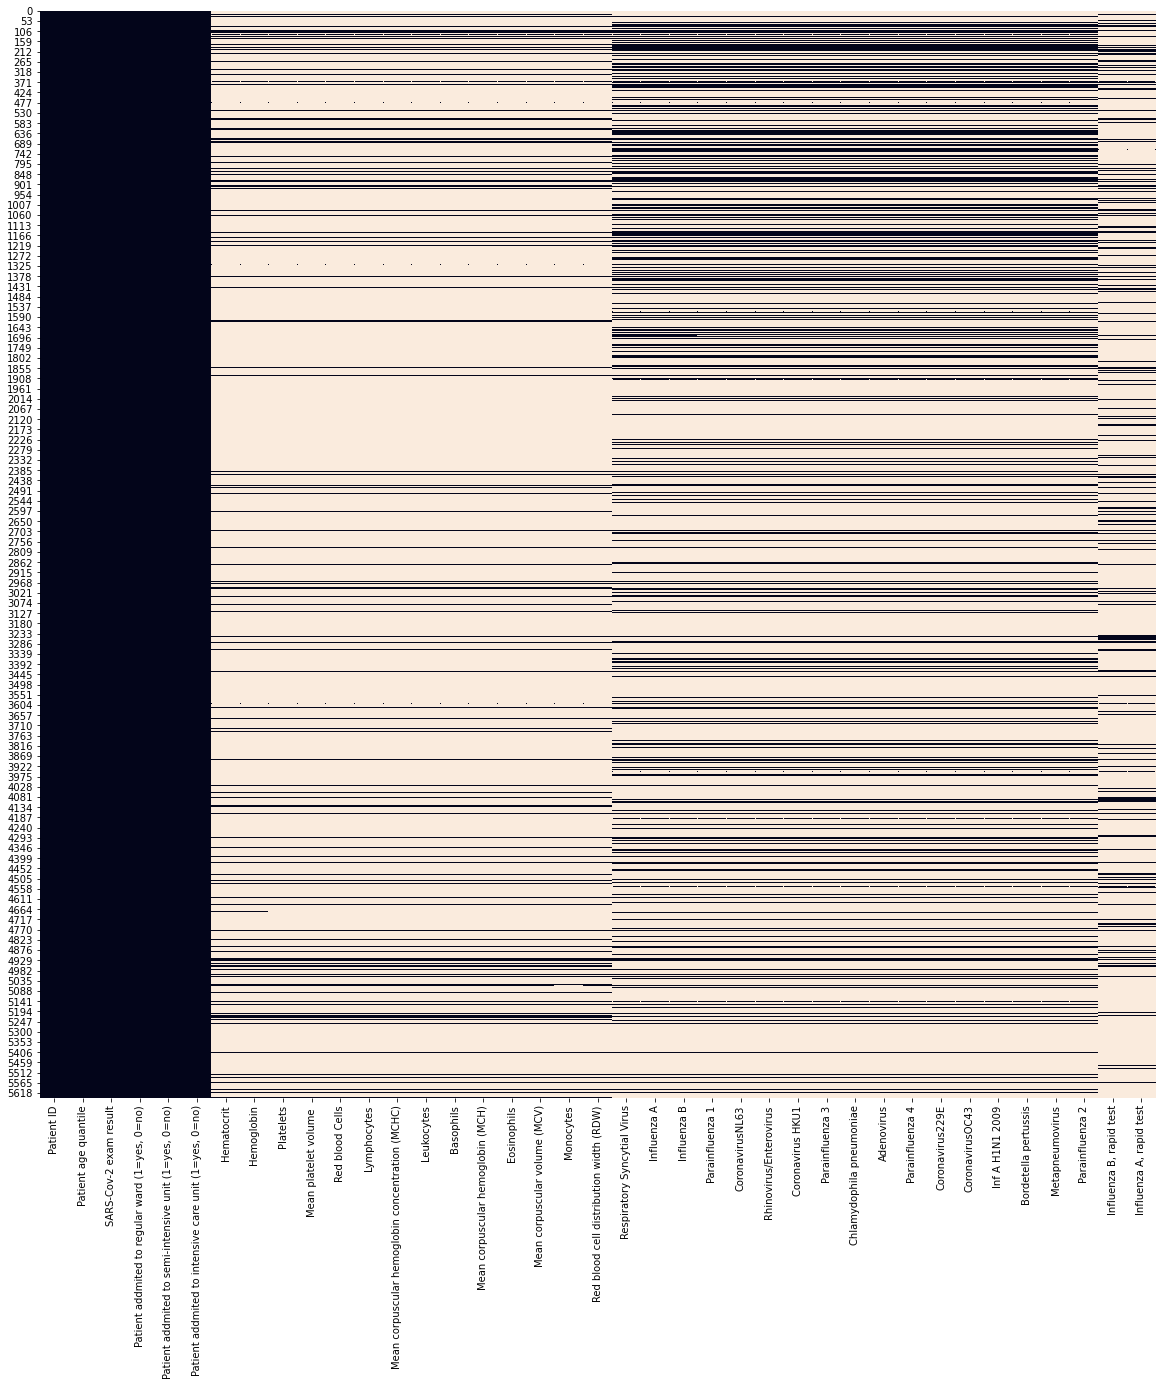

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(),cbar=False)

In [8]:
#we drop the patient ID column (useless)
df.drop('Patient ID',axis=1,inplace=True)

In [9]:
df.shape

(5644, 38)

<AxesSubplot:>

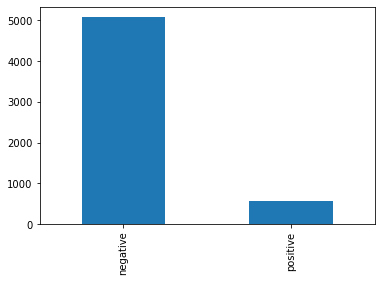

In [256]:
df['SARS-Cov-2 exam result'].value_counts().plot(kind='bar')

## Continuous features visualization

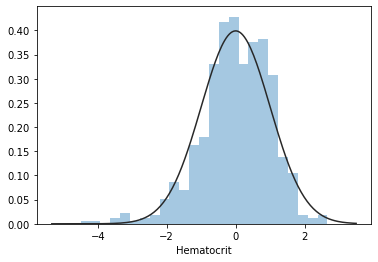

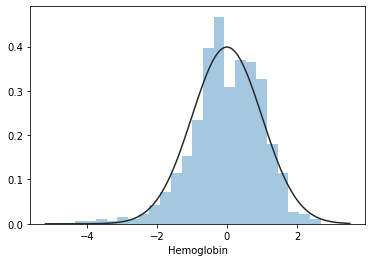

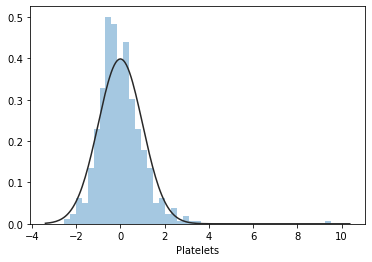

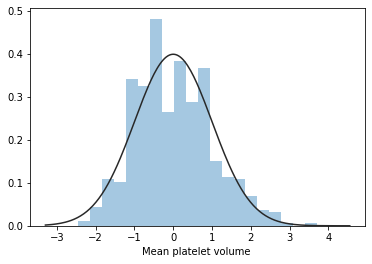

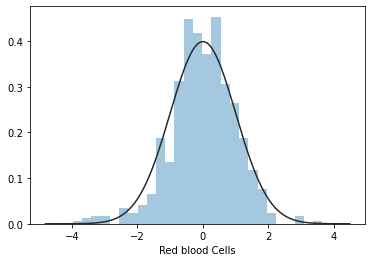

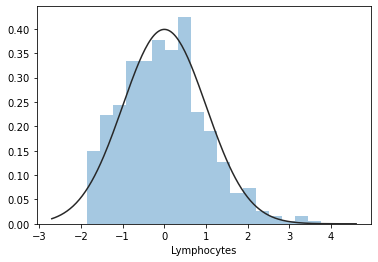

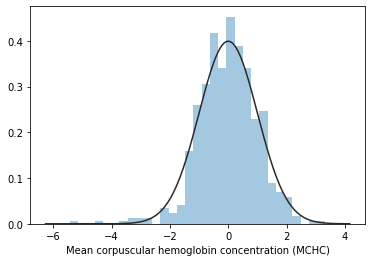

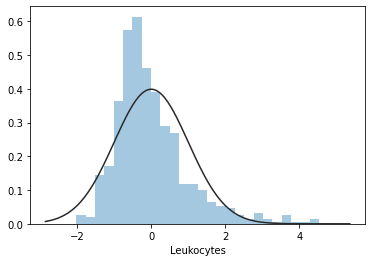

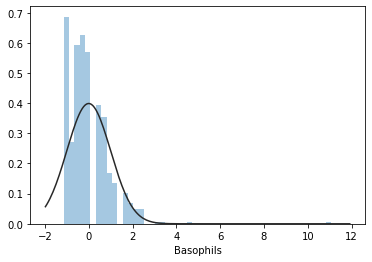

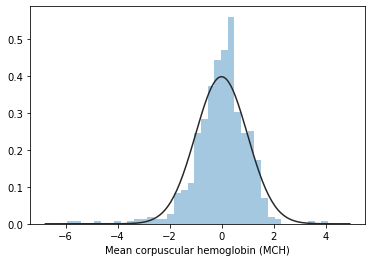

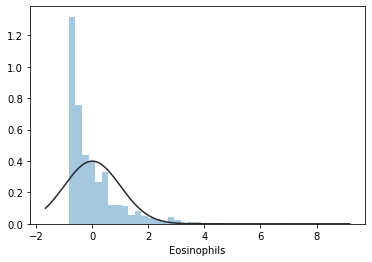

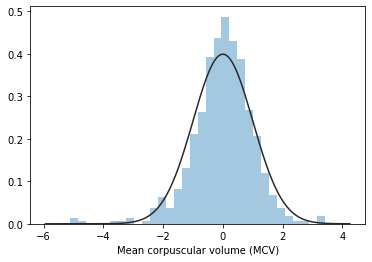

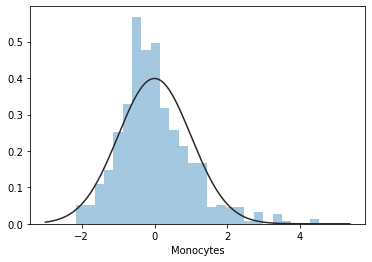

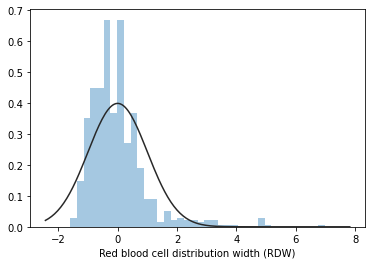

In [257]:
from scipy.stats import norm
for col in df.select_dtypes('float'):
    sns.distplot(df[col],kde=False,fit=norm)
    plt.show()

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

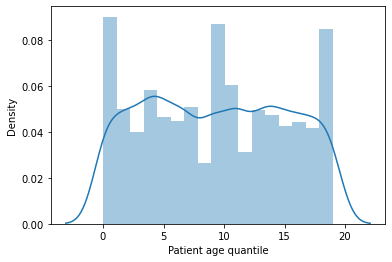

In [41]:
#visualizing the age distribution
sns.distplot(df['Patient age quantile'])

In [258]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

## Categorical Variables

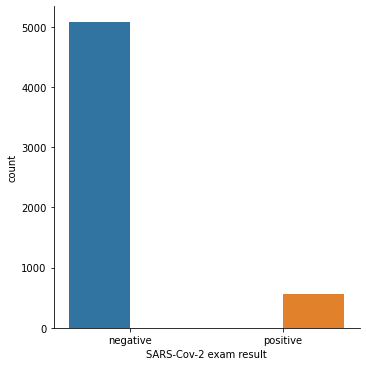

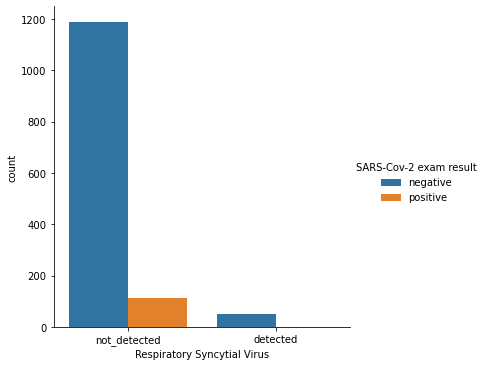

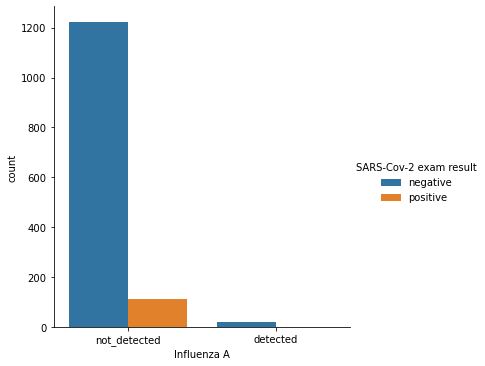

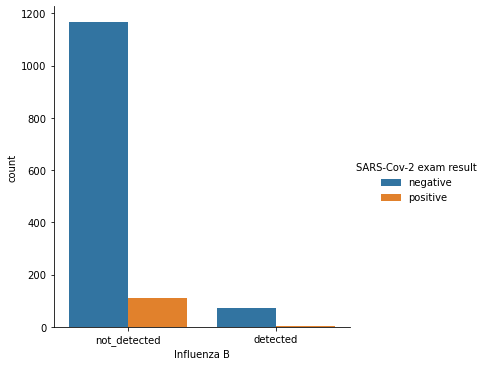

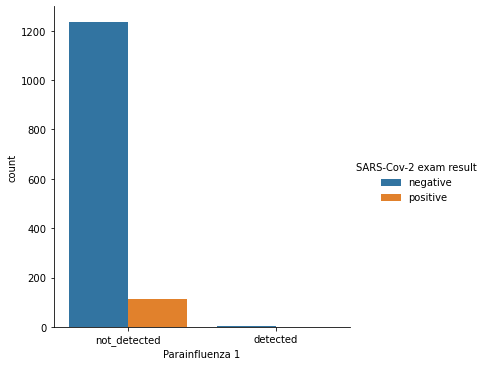

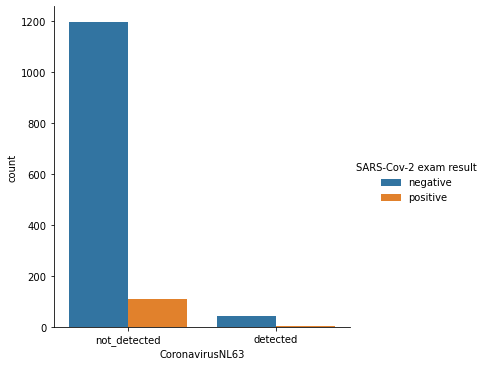

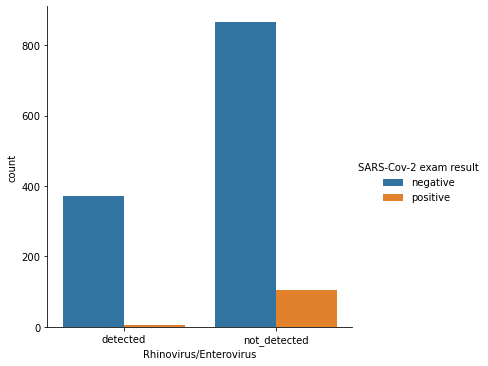

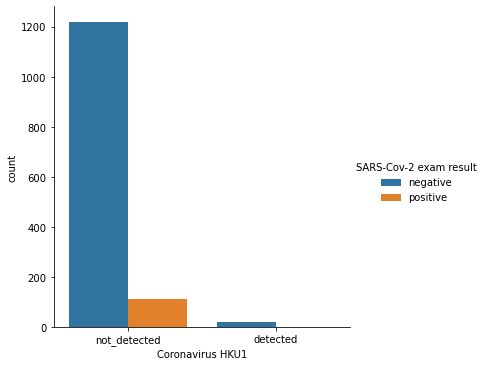

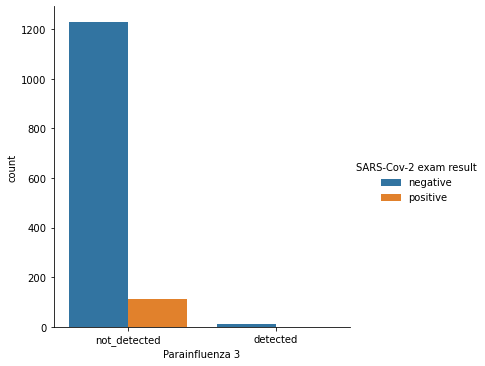

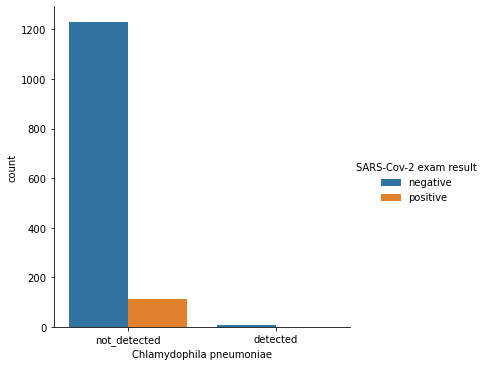

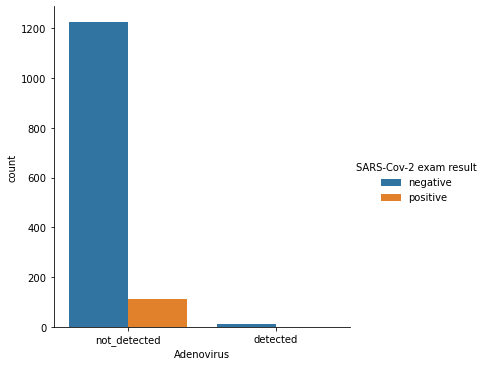

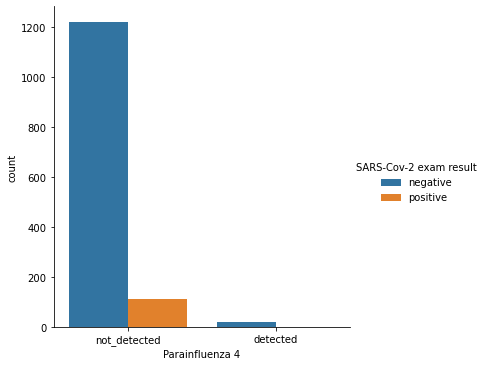

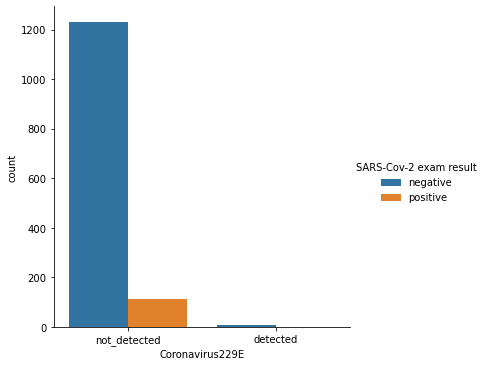

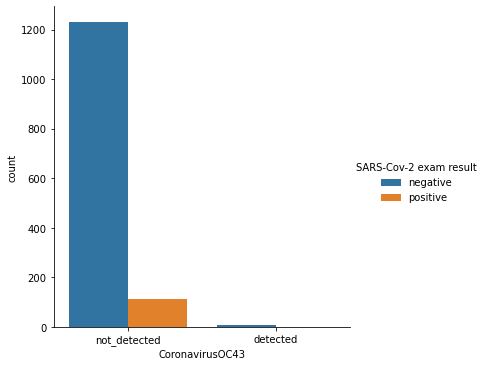

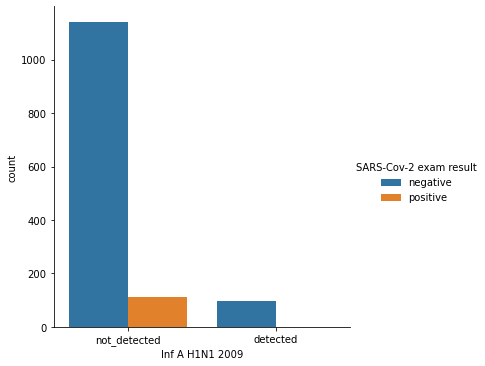

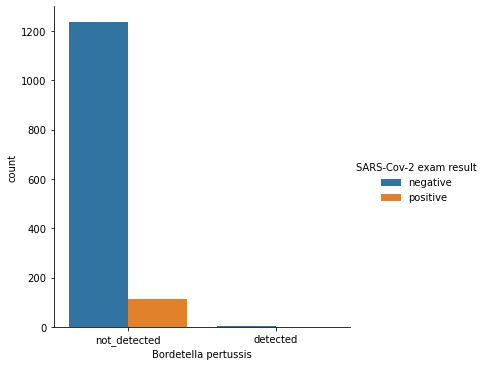

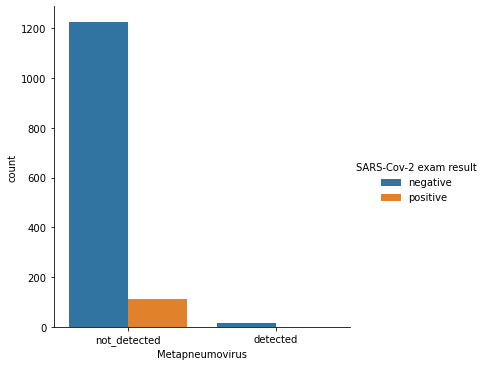

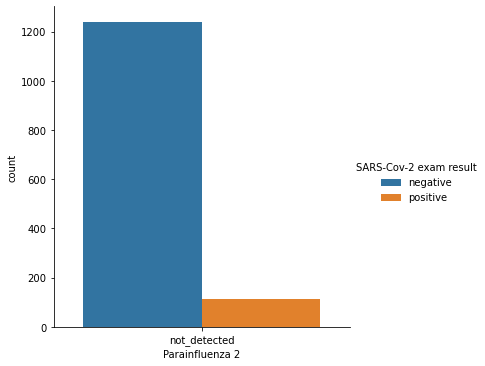

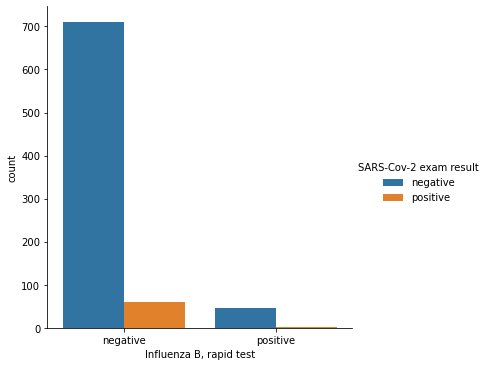

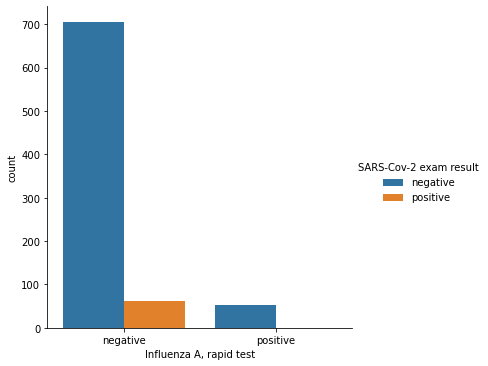

In [11]:
for col in df.select_dtypes('object'):
    sns.catplot(x=str(col),data=df,kind='count',hue='SARS-Cov-2 exam result')

## Creating  variable groups

In [10]:
# divide the data inti 2 groups positive and negative
df_pos=df[df['SARS-Cov-2 exam result']=='positive']
df_neg=df[df['SARS-Cov-2 exam result']=='negative']
print(f'df_pos shape={df_pos.shape}, df_neg shape={df_neg.shape}')

df_pos shape=(558, 38), df_neg shape=(5086, 38)


In [11]:
missing_rate=df.isna().sum()/df.shape[0]
blood_feats=df.columns[(missing_rate < 0.9)& (missing_rate > 0.88)]
test_feats=df.columns[(missing_rate < 0.88)& (missing_rate > 0.75)]
print("test_feats",test_feats.shape," | blood_feats",blood_feats.shape)

test_feats (19,)  | blood_feats (14,)


## Rel Target/Blood_features 

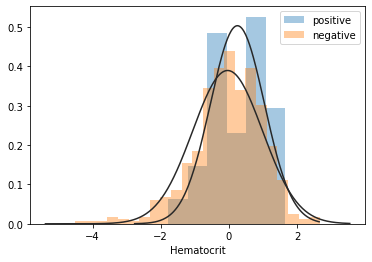

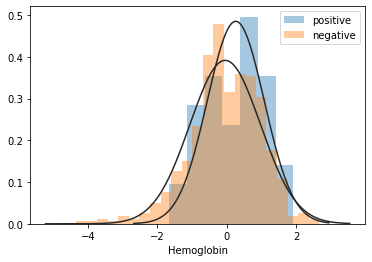

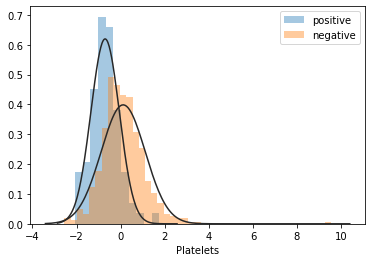

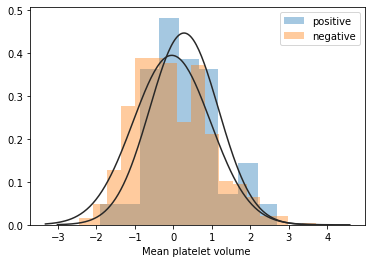

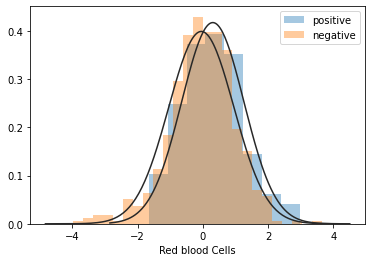

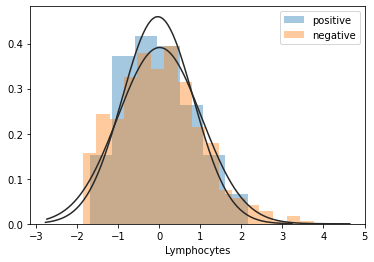

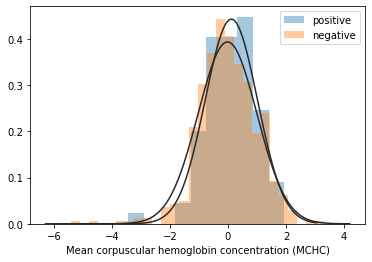

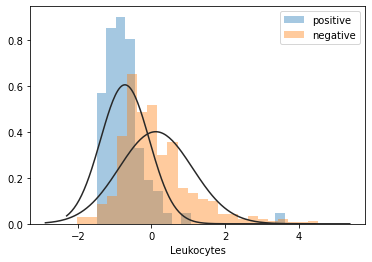

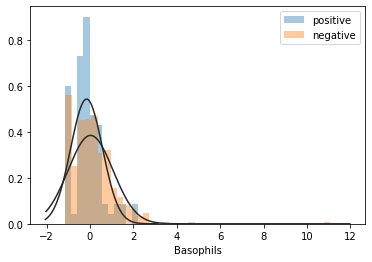

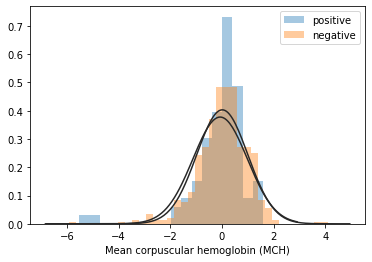

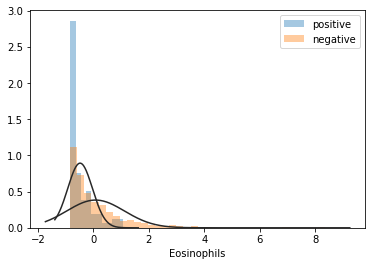

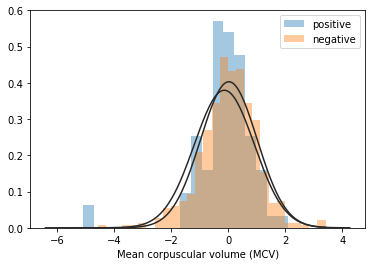

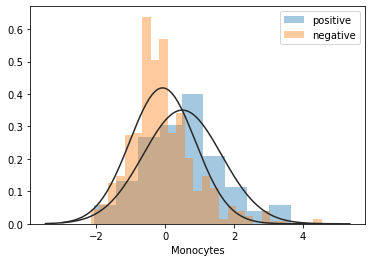

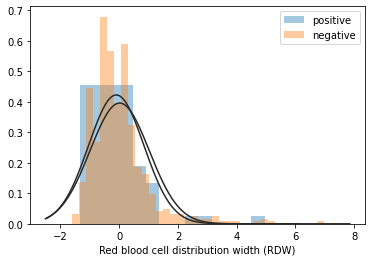

In [17]:
from scipy.stats import norm
for col in blood_feats:
    plt.figure()
    sns.distplot(df_pos[col],label='positive',fit=norm,kde=False)
    sns.distplot(df_neg[col],label='negative',fit=norm,kde=False)
    plt.legend()

<Figure size 432x288 with 0 Axes>

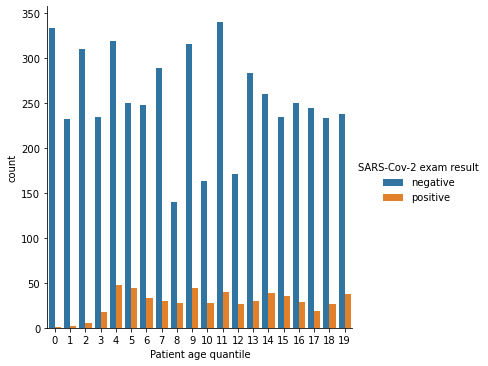

In [22]:
plt.figure()
sns.catplot(x='Patient age quantile',data=df,hue='SARS-Cov-2 exam result',kind="count")

## Rel target/test_features

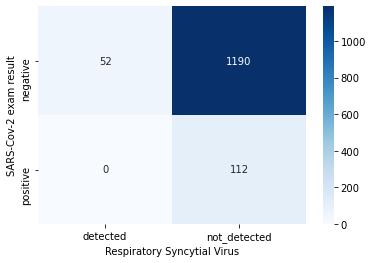

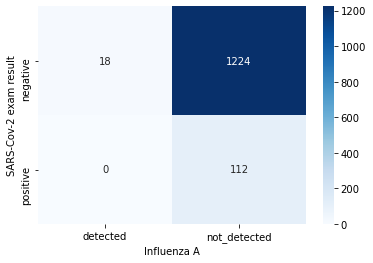

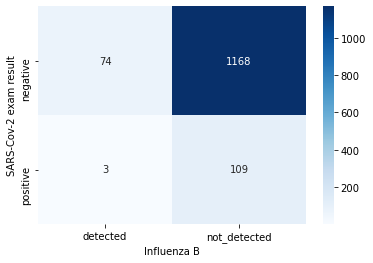

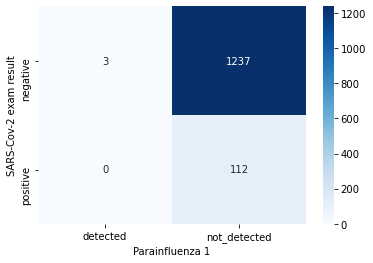

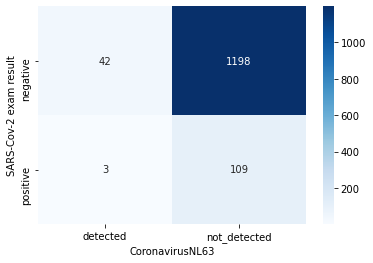

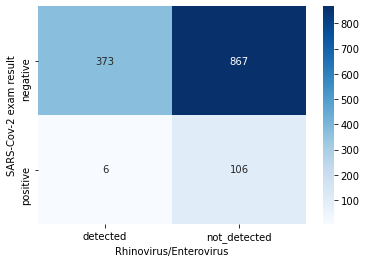

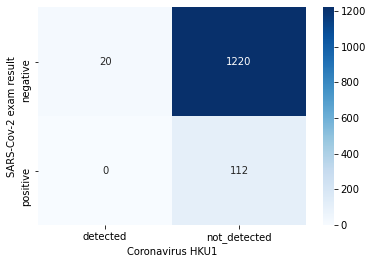

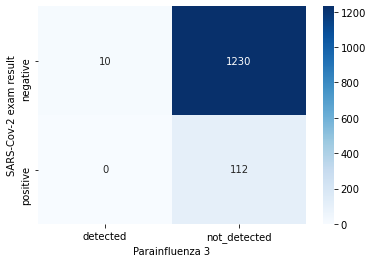

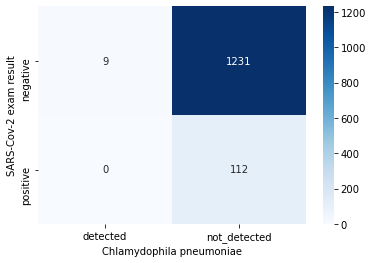

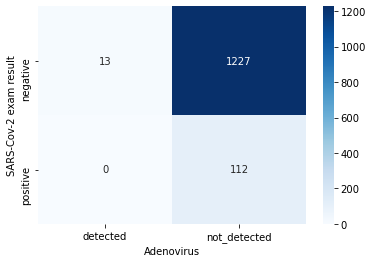

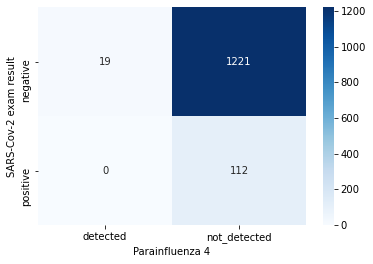

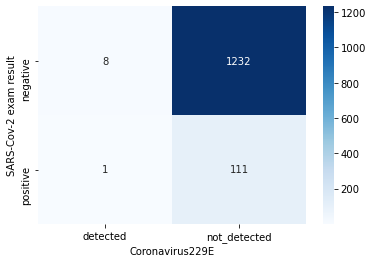

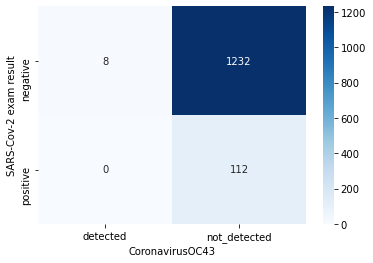

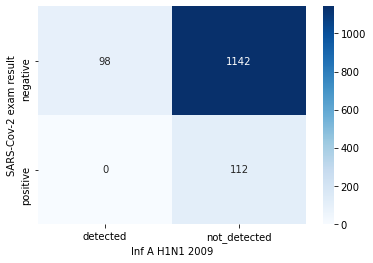

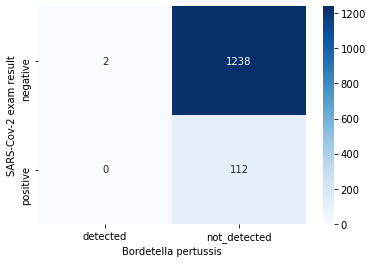

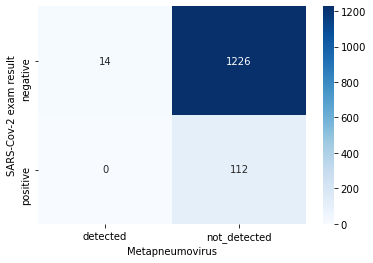

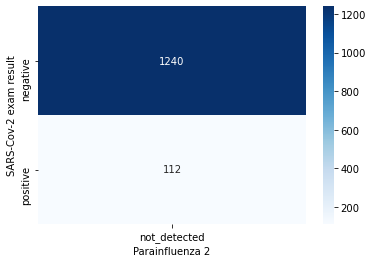

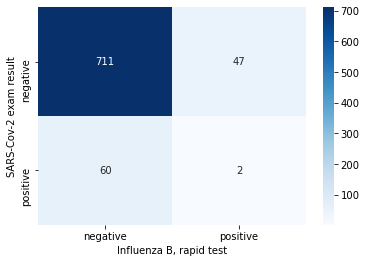

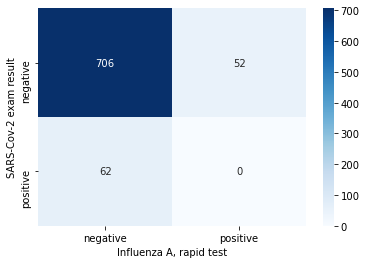

In [26]:
for col in test_feats:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d',cmap="Blues")

## Rel var/var

### Rel Age/blood_features

In [47]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

<Figure size 432x288 with 0 Axes>

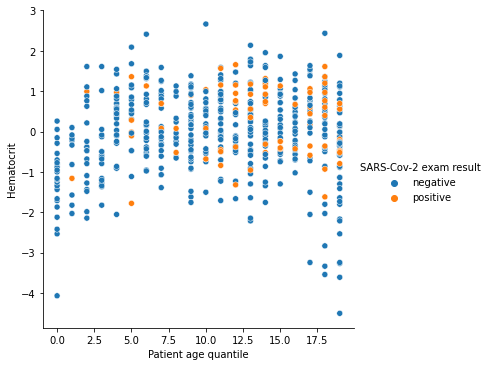

<Figure size 432x288 with 0 Axes>

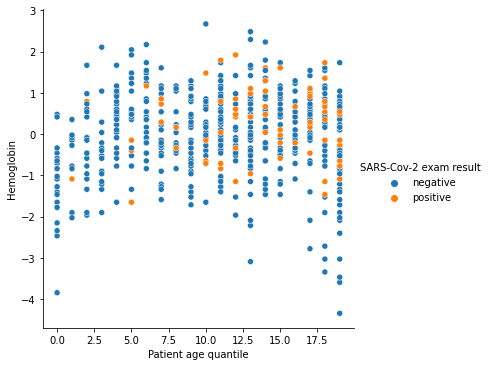

<Figure size 432x288 with 0 Axes>

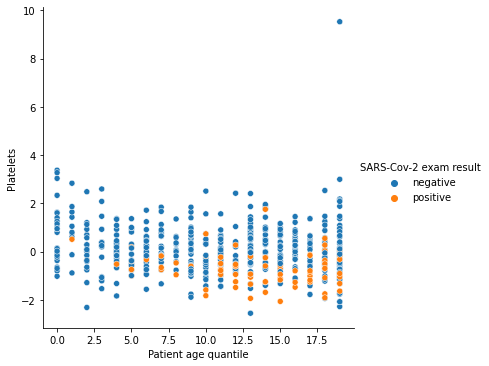

<Figure size 432x288 with 0 Axes>

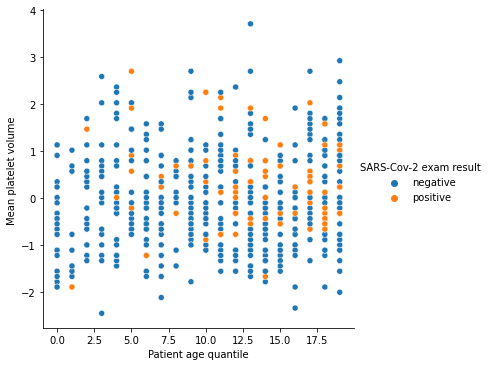

<Figure size 432x288 with 0 Axes>

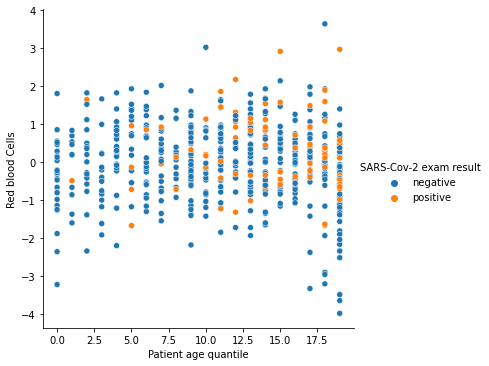

<Figure size 432x288 with 0 Axes>

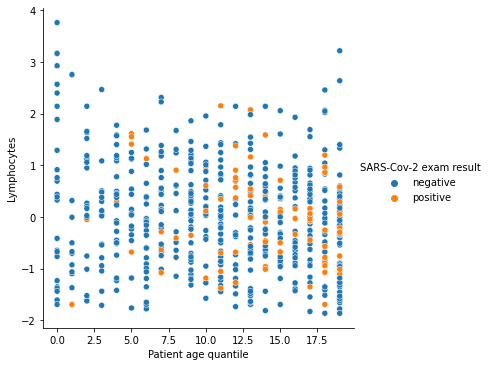

<Figure size 432x288 with 0 Axes>

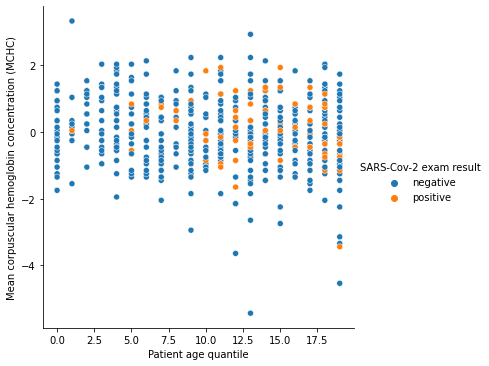

<Figure size 432x288 with 0 Axes>

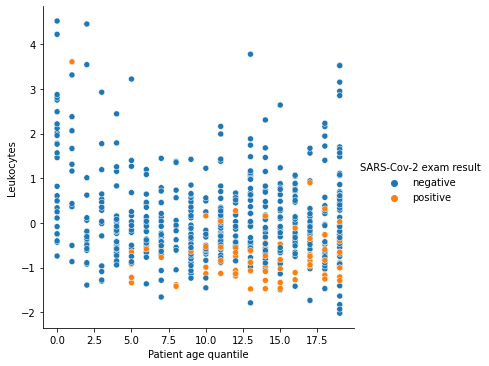

<Figure size 432x288 with 0 Axes>

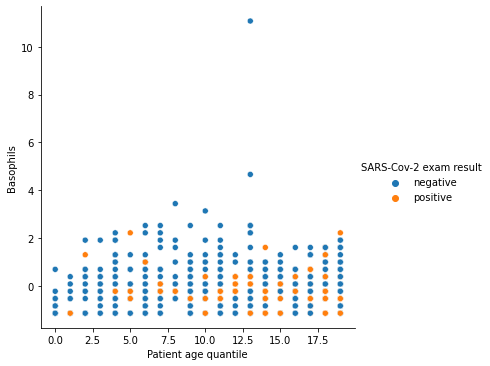

<Figure size 432x288 with 0 Axes>

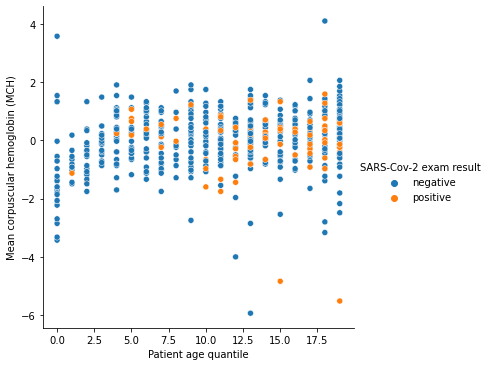

<Figure size 432x288 with 0 Axes>

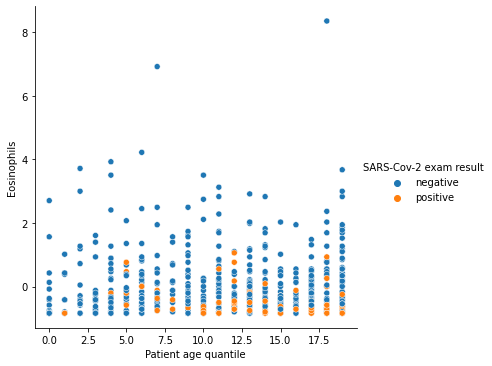

<Figure size 432x288 with 0 Axes>

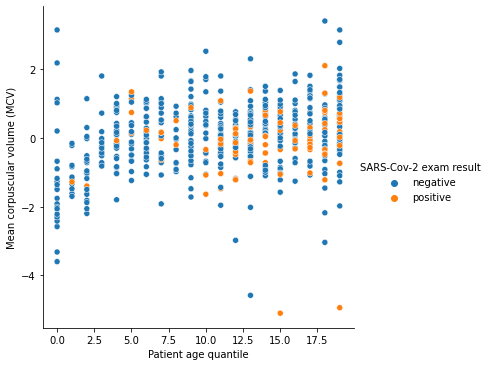

<Figure size 432x288 with 0 Axes>

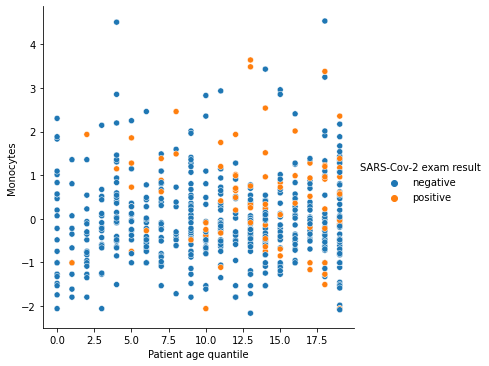

<Figure size 432x288 with 0 Axes>

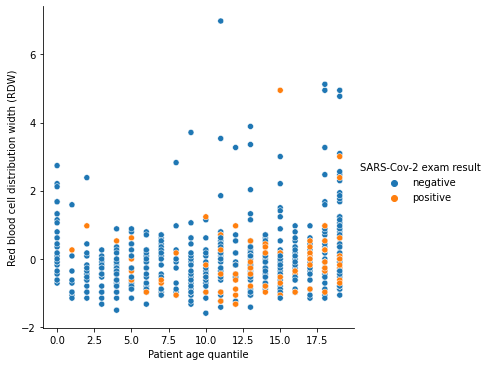

In [28]:
for col in  blood_feats:
    plt.figure()
    sns.relplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df,kind='scatter')

<Figure size 432x288 with 0 Axes>

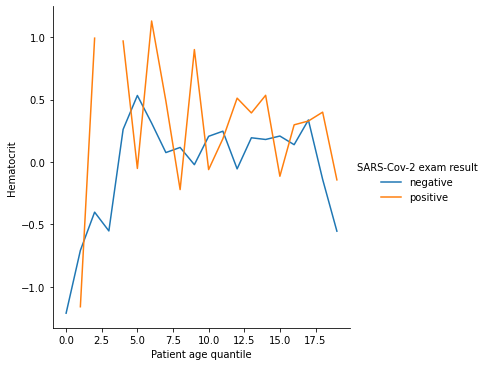

<Figure size 432x288 with 0 Axes>

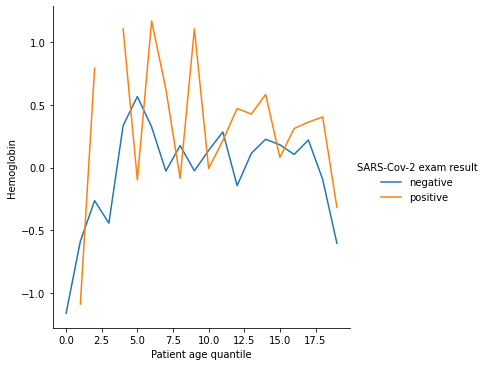

<Figure size 432x288 with 0 Axes>

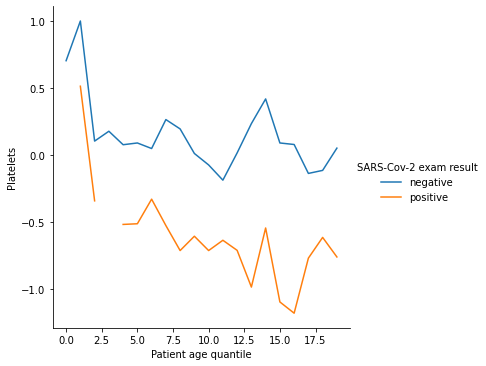

<Figure size 432x288 with 0 Axes>

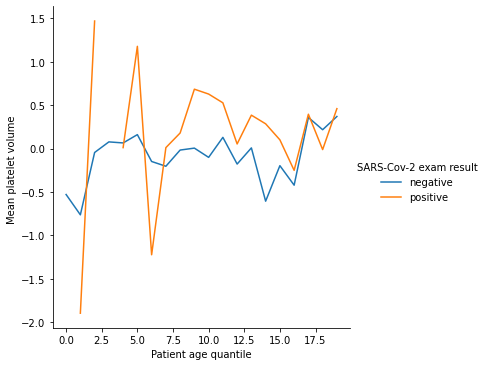

<Figure size 432x288 with 0 Axes>

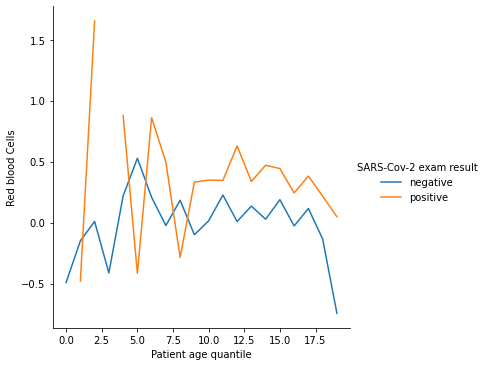

<Figure size 432x288 with 0 Axes>

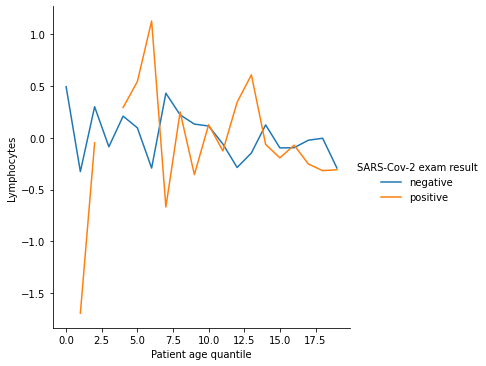

<Figure size 432x288 with 0 Axes>

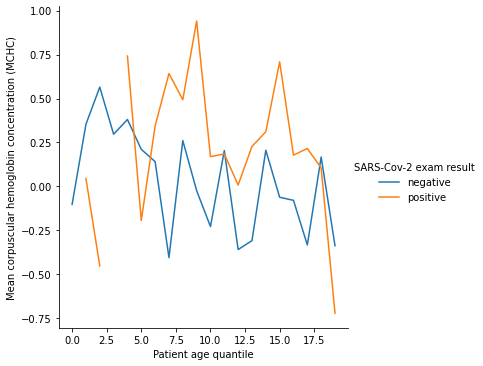

<Figure size 432x288 with 0 Axes>

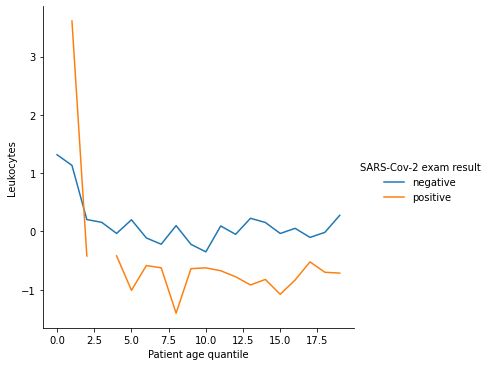

<Figure size 432x288 with 0 Axes>

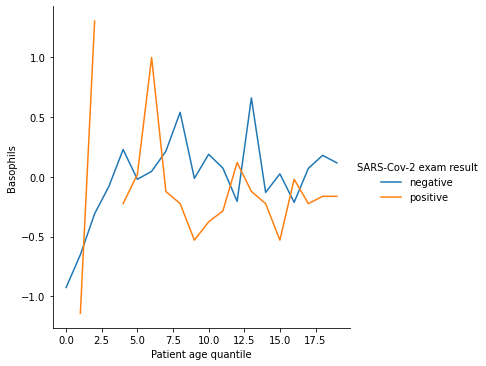

<Figure size 432x288 with 0 Axes>

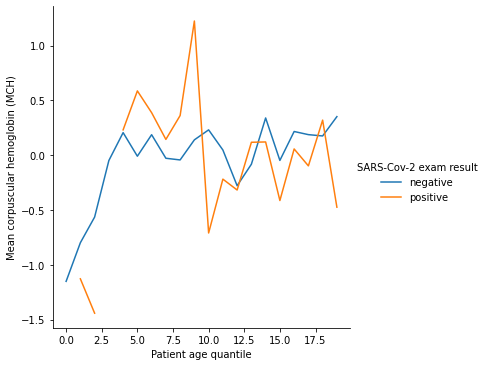

<Figure size 432x288 with 0 Axes>

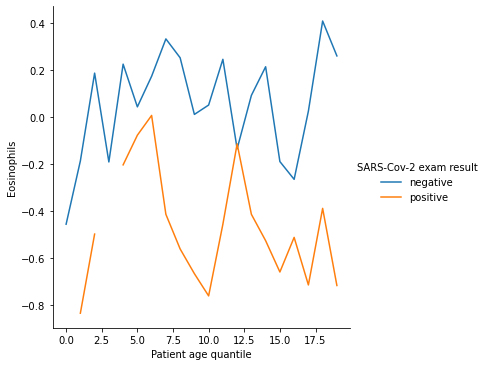

<Figure size 432x288 with 0 Axes>

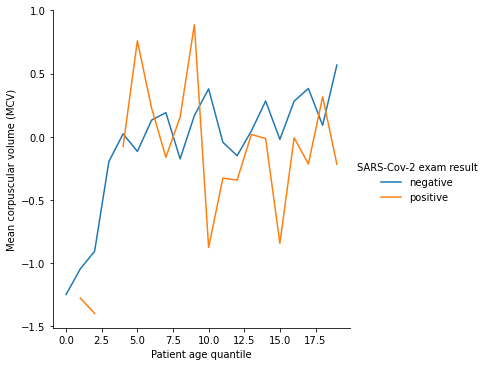

<Figure size 432x288 with 0 Axes>

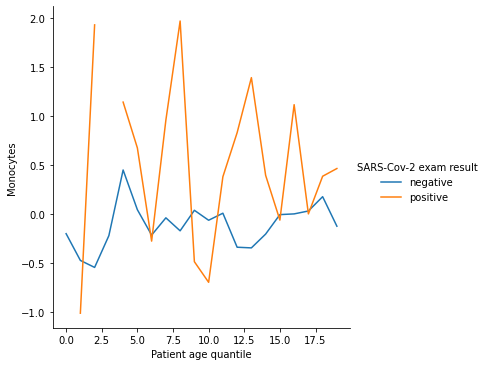

<Figure size 432x288 with 0 Axes>

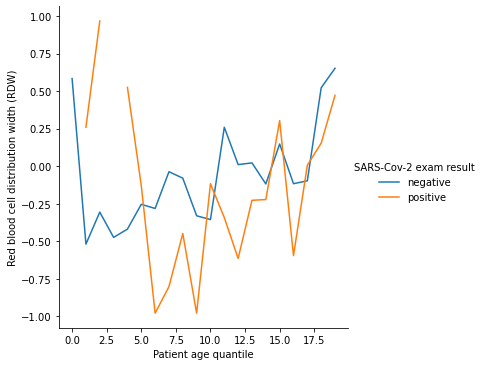

In [31]:
for col in  blood_feats:
    plt.figure()
    sns.relplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df,kind='line')

<Figure size 432x288 with 0 Axes>

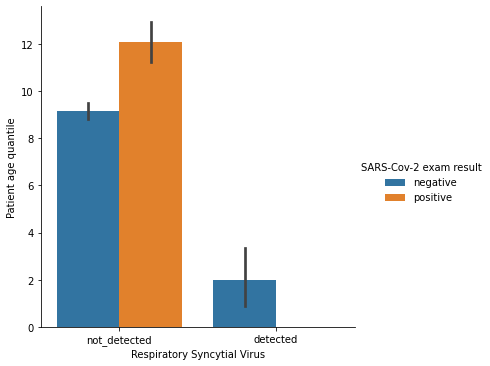

<Figure size 432x288 with 0 Axes>

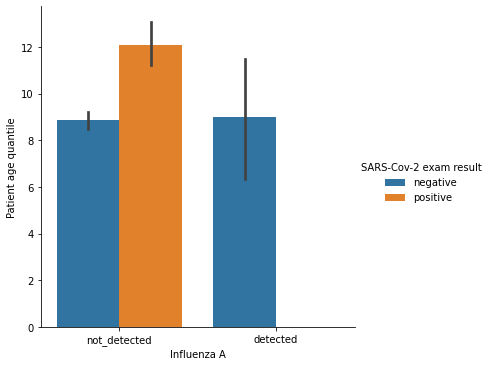

<Figure size 432x288 with 0 Axes>

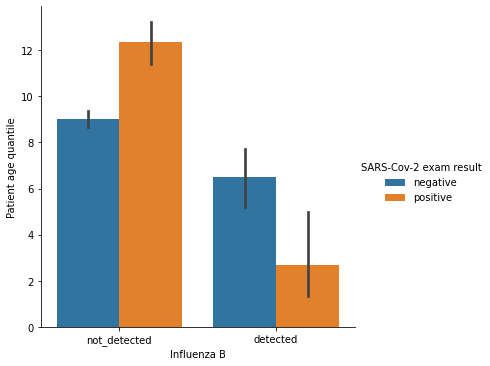

<Figure size 432x288 with 0 Axes>

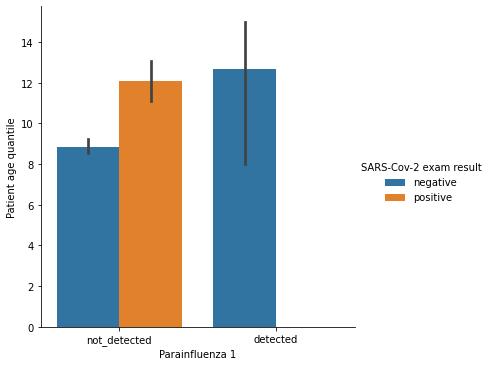

<Figure size 432x288 with 0 Axes>

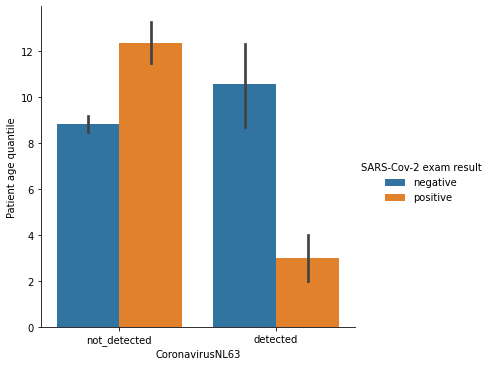

<Figure size 432x288 with 0 Axes>

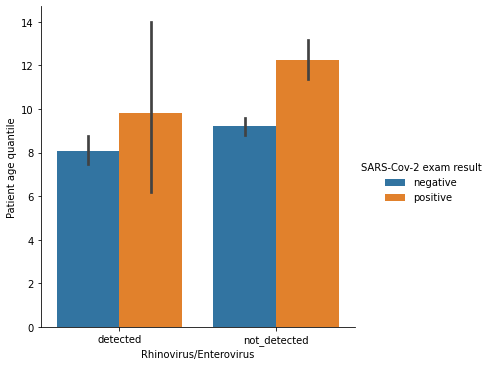

<Figure size 432x288 with 0 Axes>

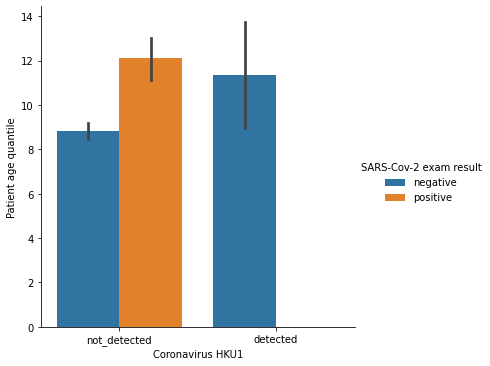

<Figure size 432x288 with 0 Axes>

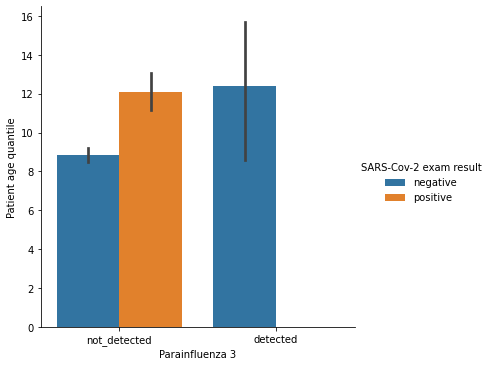

<Figure size 432x288 with 0 Axes>

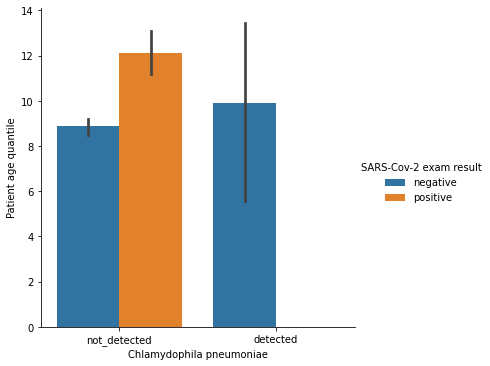

<Figure size 432x288 with 0 Axes>

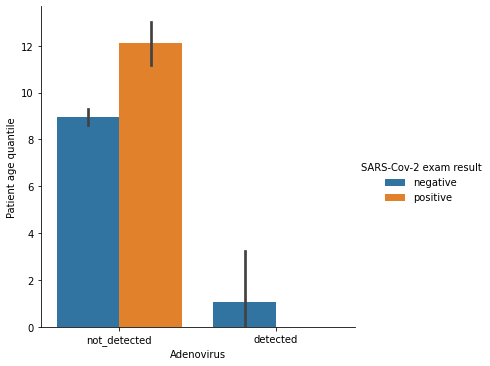

<Figure size 432x288 with 0 Axes>

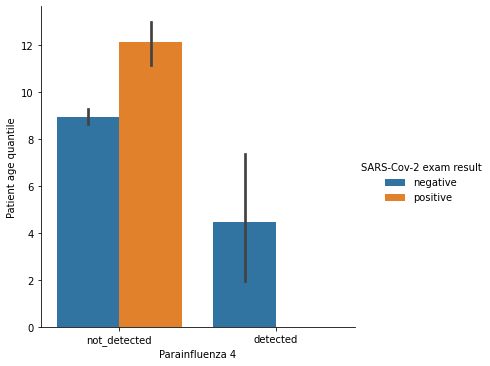

<Figure size 432x288 with 0 Axes>

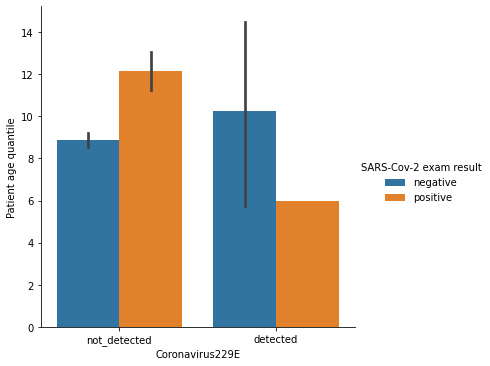

<Figure size 432x288 with 0 Axes>

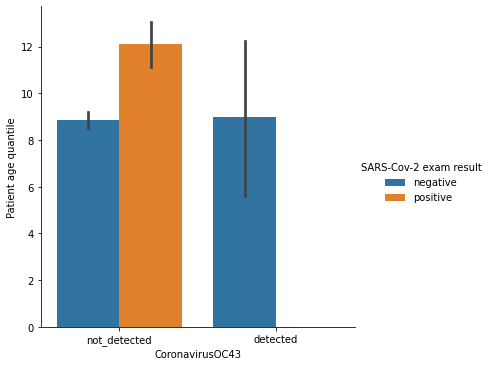

<Figure size 432x288 with 0 Axes>

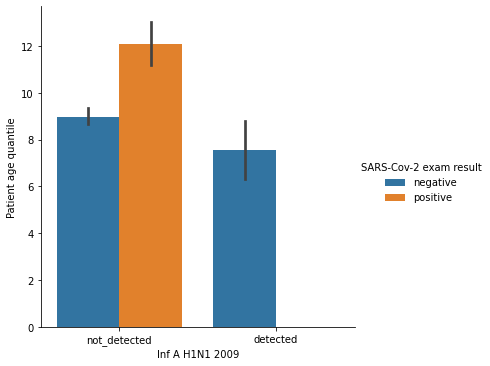

<Figure size 432x288 with 0 Axes>

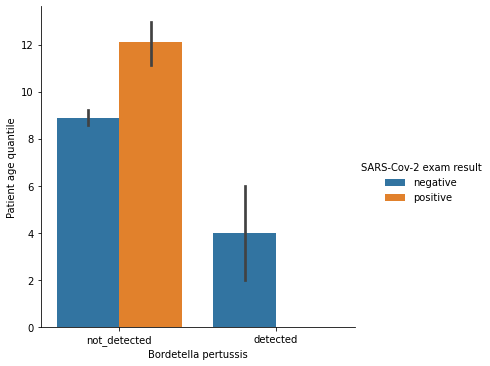

<Figure size 432x288 with 0 Axes>

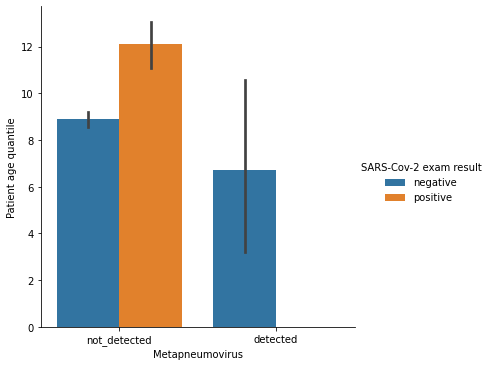

<Figure size 432x288 with 0 Axes>

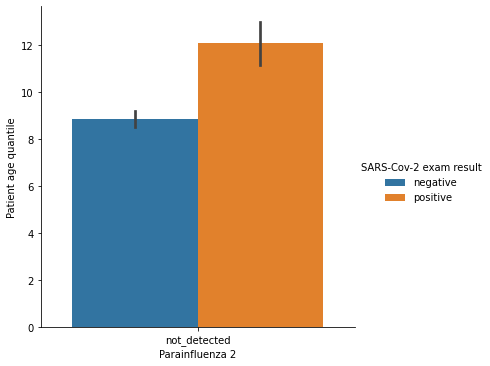

<Figure size 432x288 with 0 Axes>

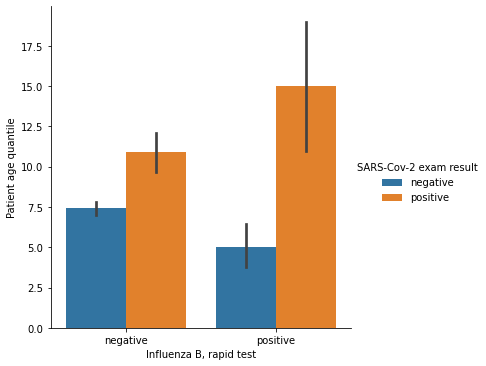

<Figure size 432x288 with 0 Axes>

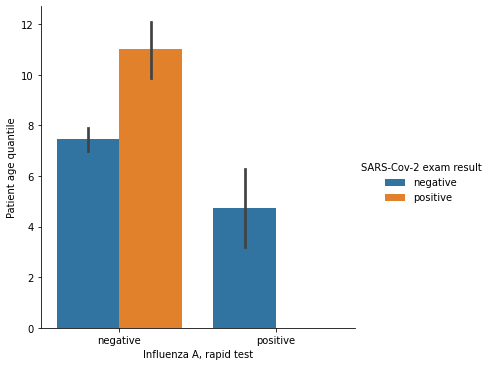

In [39]:
for col in test_feats:
    plt.figure()
    sns.catplot(x=str(col),y='Patient age quantile',hue='SARS-Cov-2 exam result',data=df,kind='bar')

## Rel blood/blood

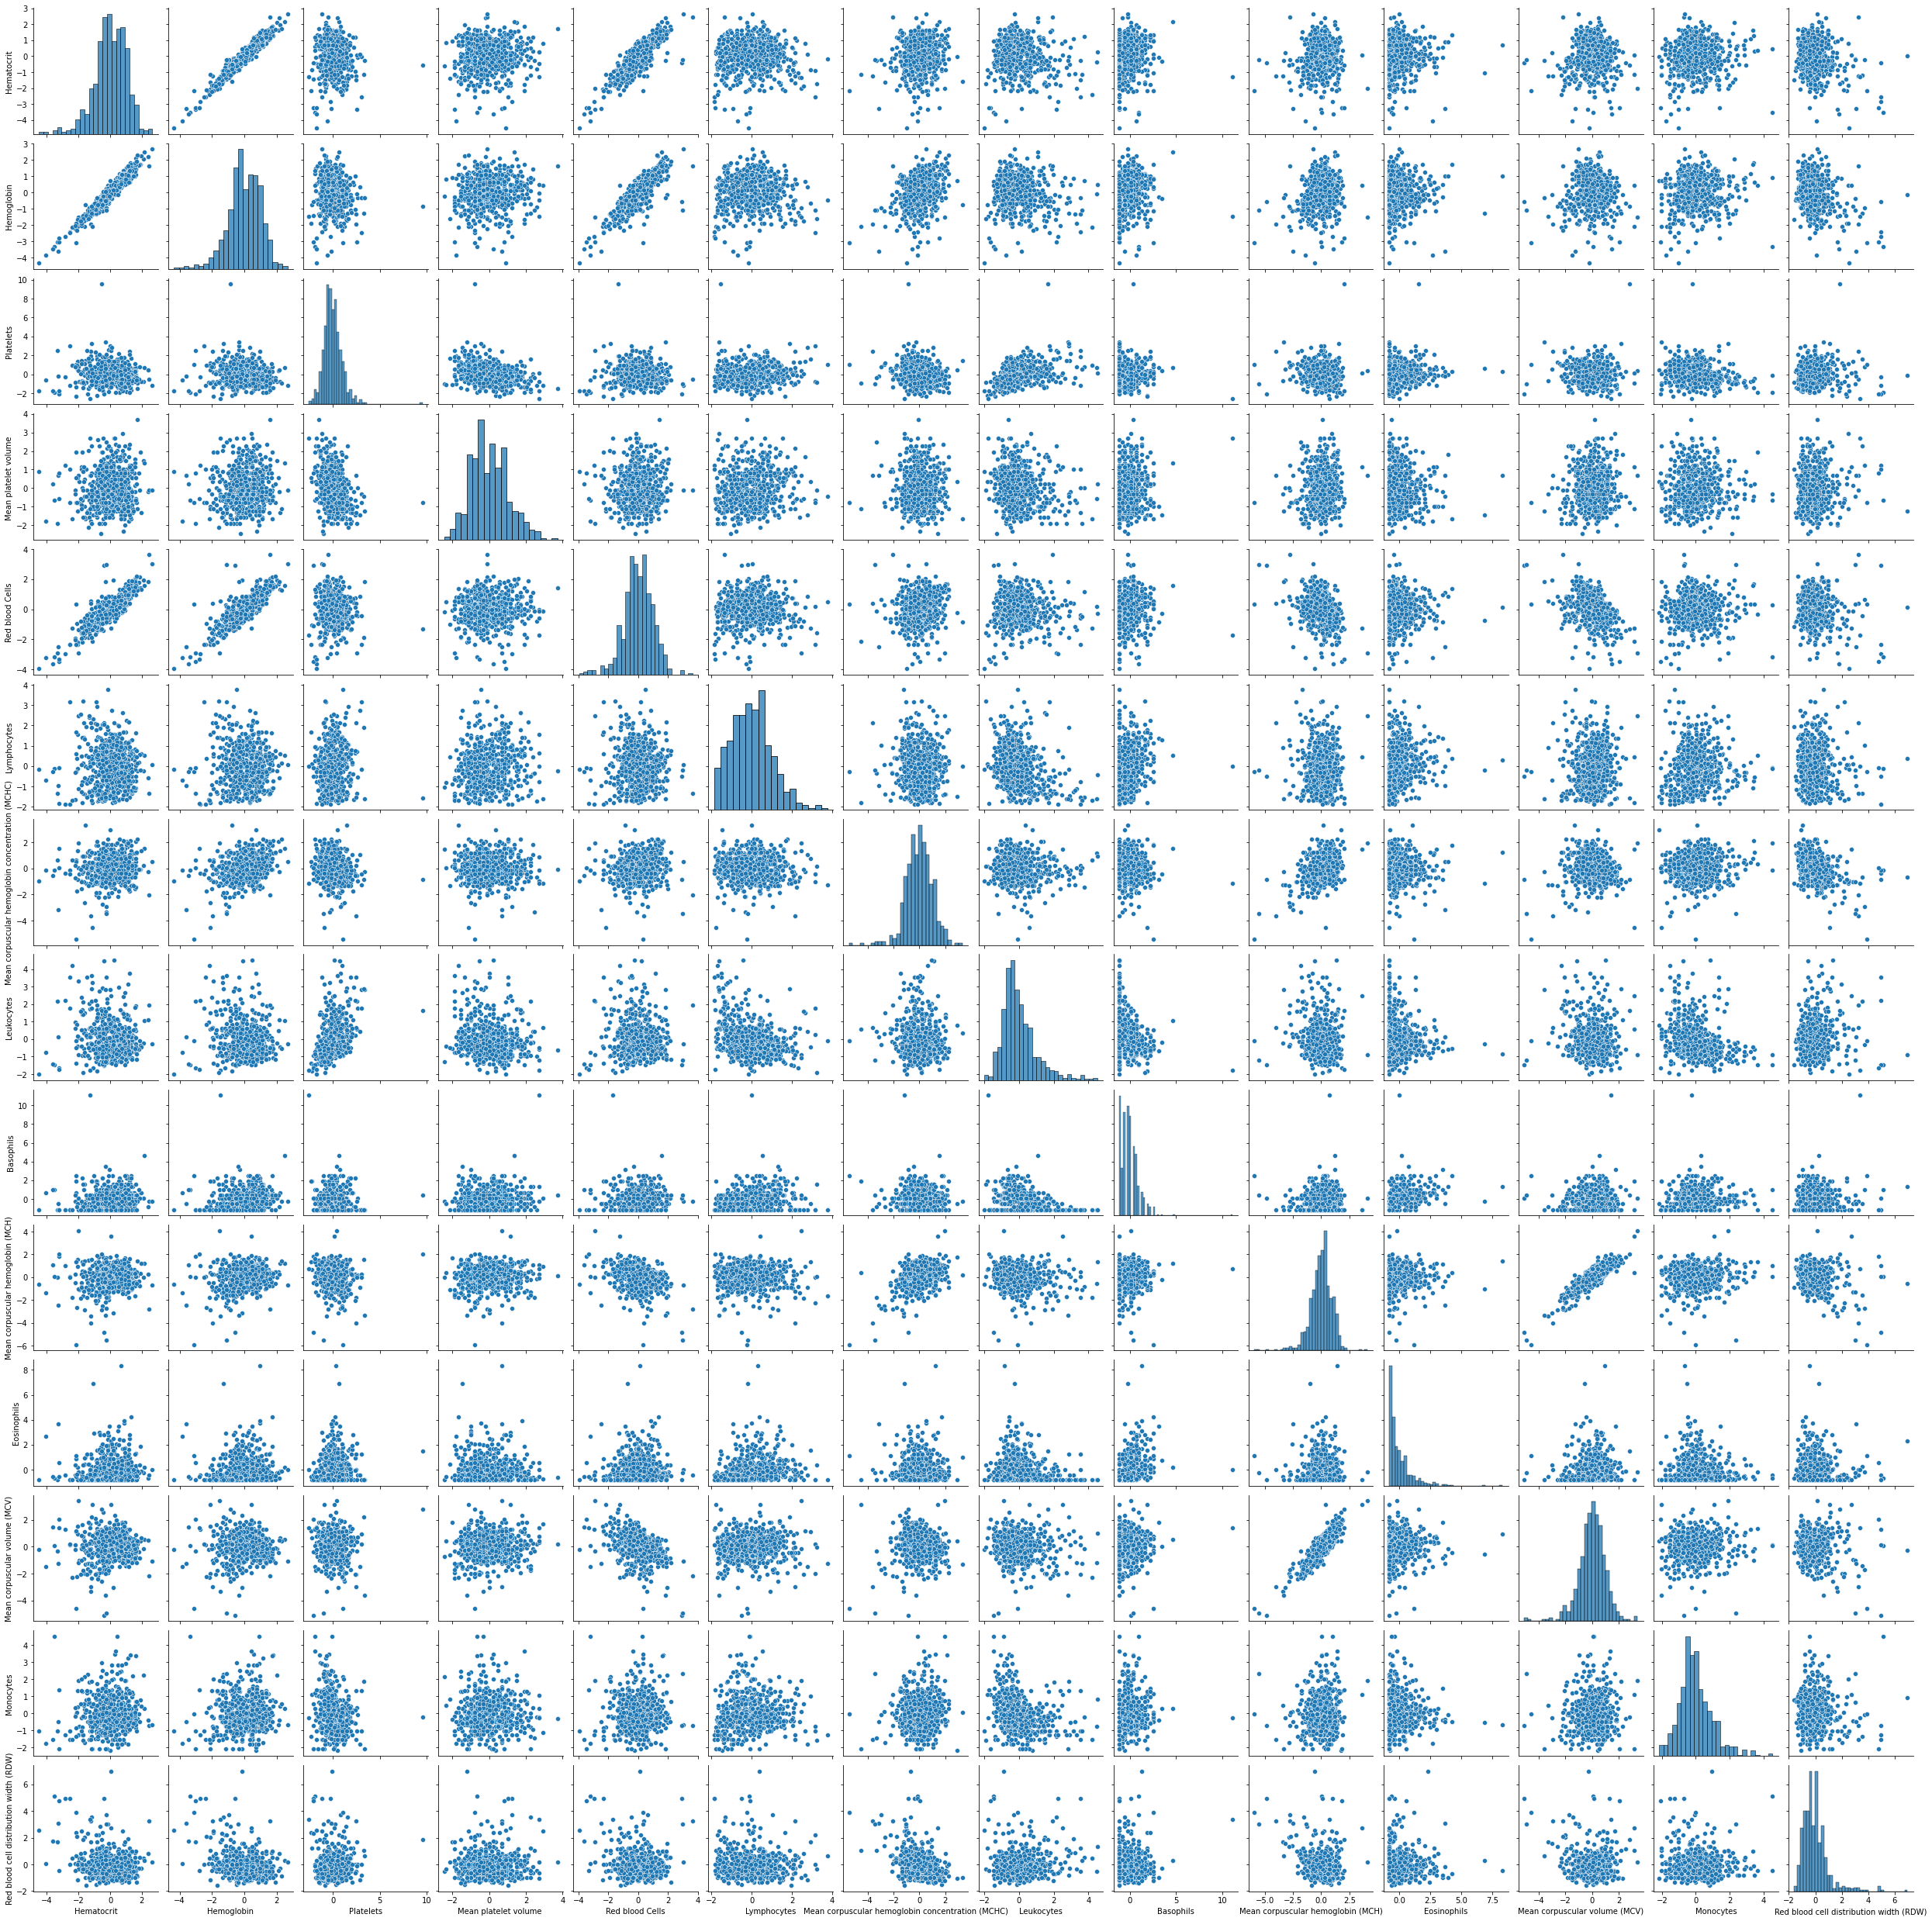

In [40]:
sns.pairplot(df[blood_feats])

<AxesSubplot:>

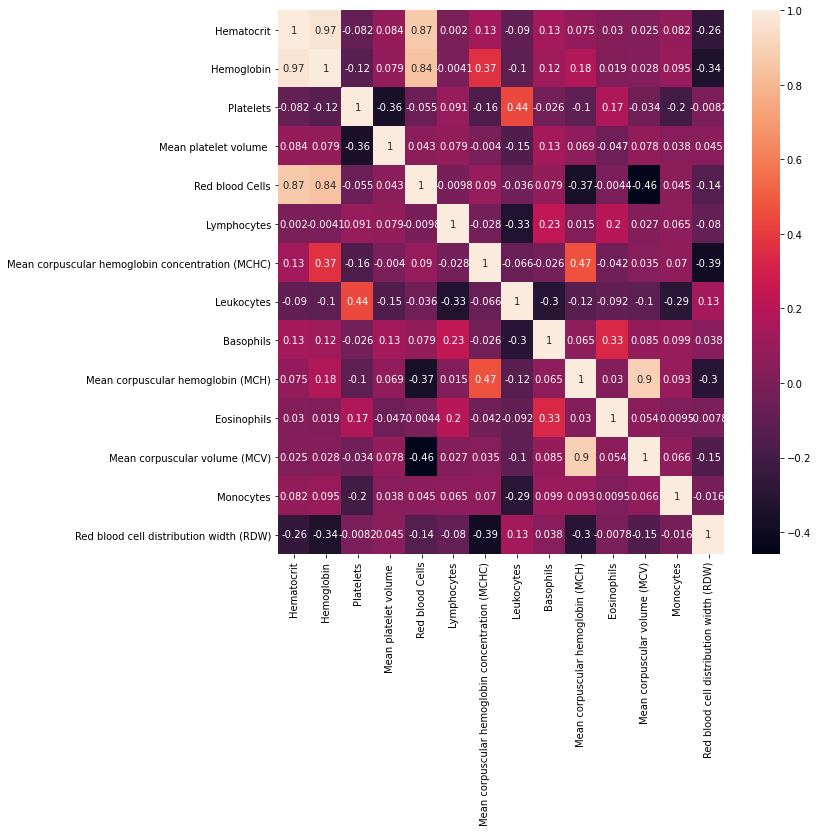

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df[blood_feats].corr(),annot=True)

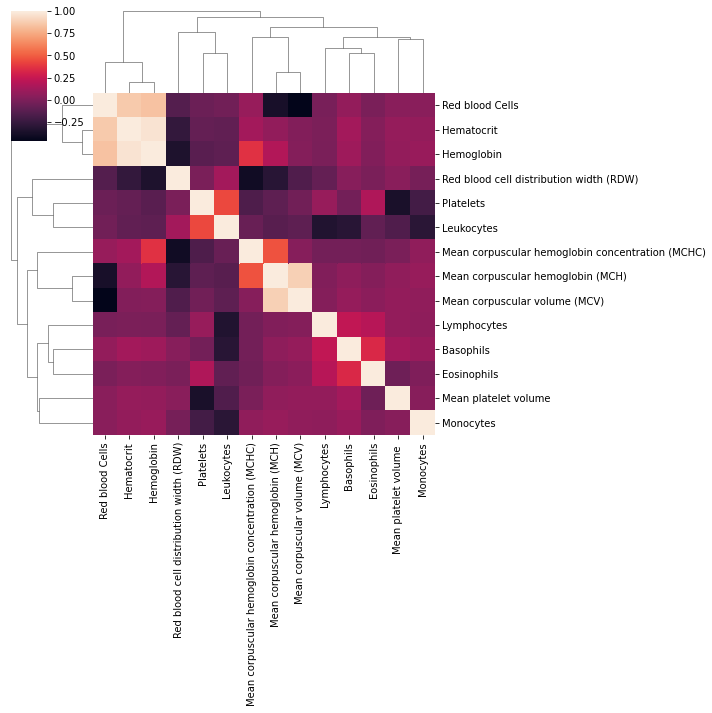

In [45]:
sns.clustermap(df[blood_feats].corr())

## Test/Tets

In [12]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [13]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [14]:
## rapid tests are unreliable bad recall/sensitivity
test_feats=test_feats.drop(['Influenza B, rapid test','Influenza A, rapid test'])

In [15]:
#only has undetected 
test_feats=test_feats.drop('Parainfluenza 2')

In [16]:
print(test_feats,'\n',test_feats.shape)

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus'],
      dtype='object') 
 (16,)


In [17]:
df['is_sick']=np.sum(df[test_feats]=='detected',axis=1)>=1

In [18]:
df['is_sick']

0       False
1        True
2       False
3       False
4        True
        ...  
5639    False
5640    False
5641    False
5642    False
5643    False
Name: is_sick, Length: 5644, dtype: bool

In [267]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test is_sick  
0                      NaN                      NaN   False  
1                 negative                 negative    True  
2                      NaN                      NaN   False  
3                      NaN                      NaN   False  
4                      NaN                      NaN    True  

[5 rows x 39 columns]

### Rel test/blood

In [19]:
sick_df = df[df['is_sick'] == True]
not_sick_df = df[df['is_sick'] == False]

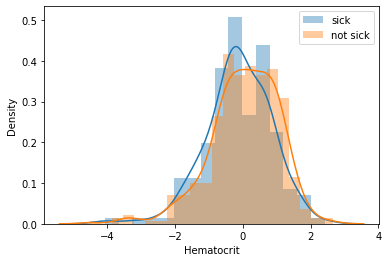

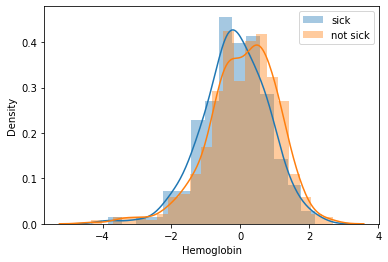

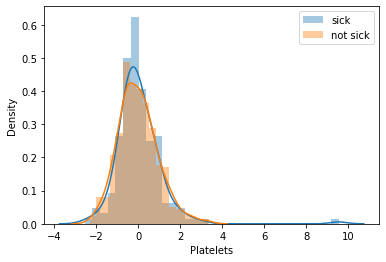

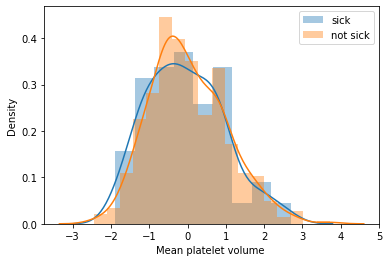

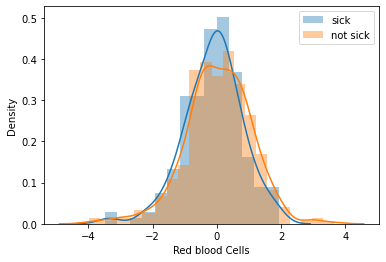

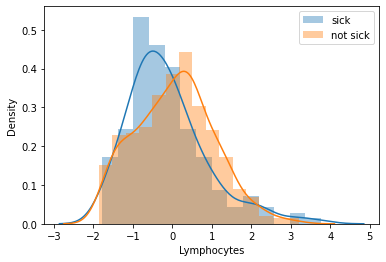

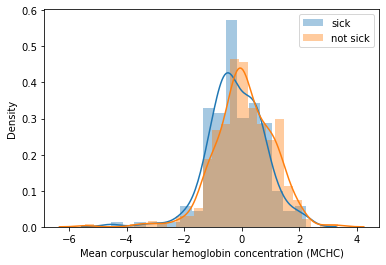

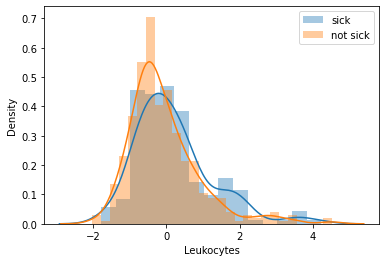

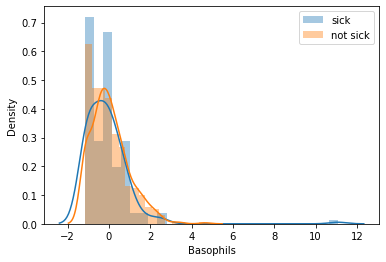

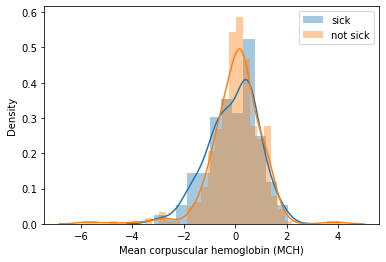

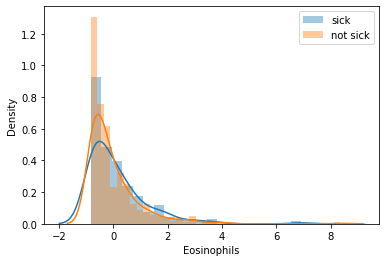

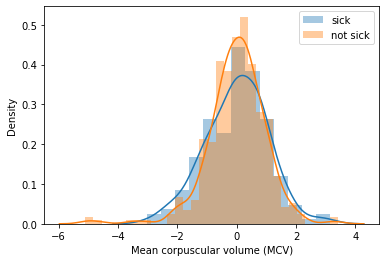

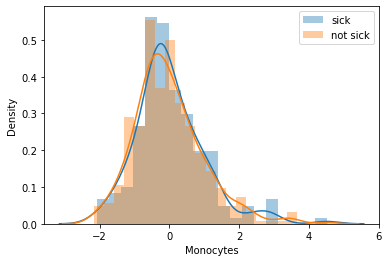

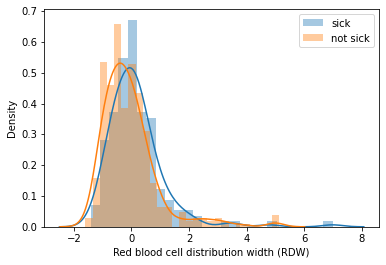

In [66]:
for col in blood_feats:
    plt.figure()
    sns.distplot(sick_df[col],label='sick')
    sns.distplot(not_sick_df[col],label='not sick')
    plt.legend()

## rel age/sick

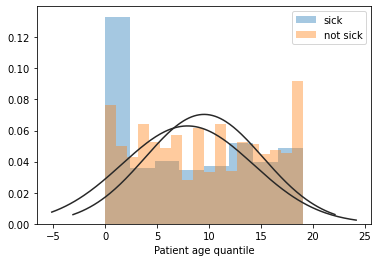

In [69]:
sns.distplot(sick_df['Patient age quantile'],label='sick',fit=norm,kde=False)
sns.distplot(noT_sick_df['Patient age quantile'],label='not sick',fit=norm,kde=False)
plt.legend()

### Patient admission variables

In [20]:
def hospitalization(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'survelliance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'intensive'
    else:
        return 'unknown'

In [21]:
df['status'] = df.apply(hospitalization, axis=1)

In [22]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0              NaN              NaN              NaN                   NaN   
1     not_detected     not_detected     not_detected          not_detected   
2              NaN              NaN              NaN                   NaN   
3              NaN              NaN              NaN                   NaN   
4     not_detected     not_detected     not_detected          not_detected   

   Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
0              NaN              NaN                      NaN   
1     not_detected     not_detected                 negative   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4     not_detected     not_detected                      NaN   

   Influenza A, rapid test  is_sick   status  
0                      NaN    False  unknown  
1                 negative     True  unknown  
2                      NaN    False  unknown  
3                      NaN    False  unknown  
4                      NaN     True  unknown  

[5 rows x 40 columns]

## Rel blood/hospital_admission

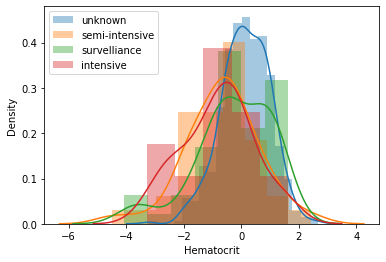

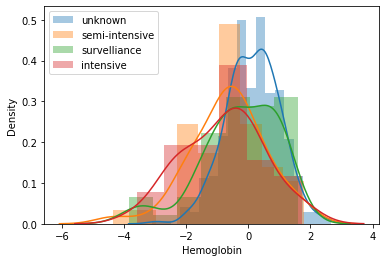

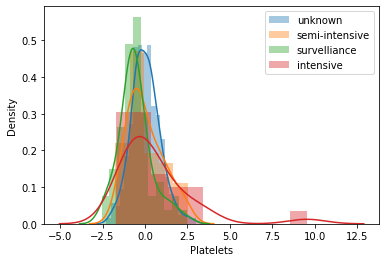

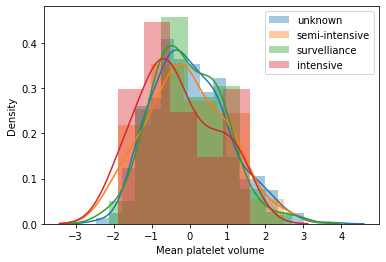

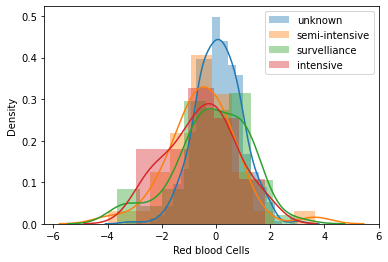

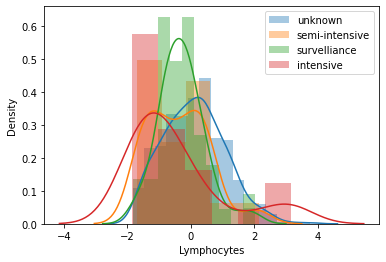

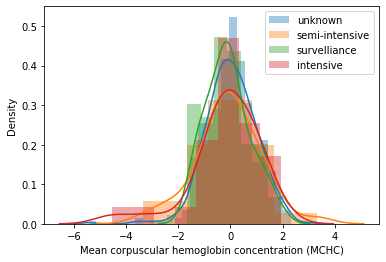

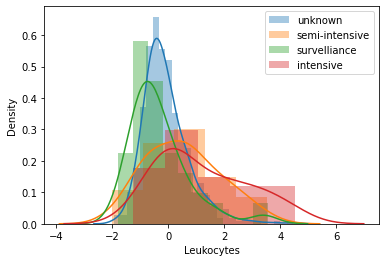

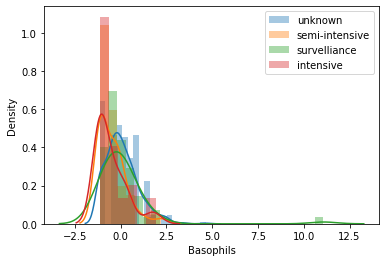

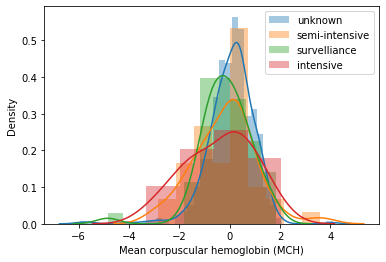

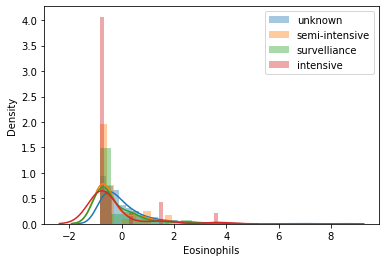

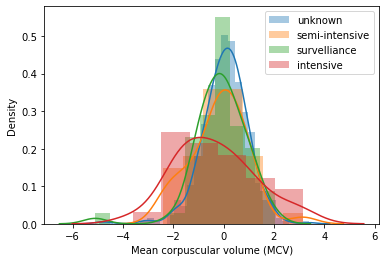

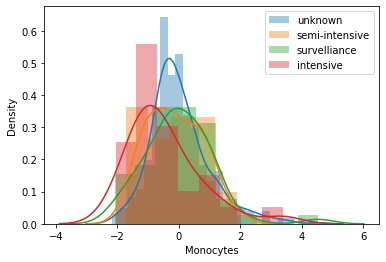

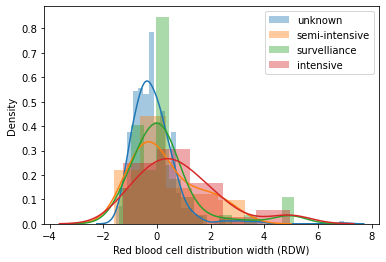

In [80]:
for col in blood_feats:
    plt.figure()
    for cat in df['status'].unique():
        sns.distplot(df[df['status']==cat][col], label=cat)
    plt.legend()

### NAN analysis

In [23]:
df1=df[blood_feats]
df2=df[test_feats]
print(f'df1 dropna shape={df1.dropna().shape}, df2 shape={df2.dropna().shape}')

df1 dropna shape=(598, 14), df2 shape=(1352, 16)


In [24]:
df1['covid']=df['SARS-Cov-2 exam result']
df1=df1.dropna()
df1['covid'].value_counts(normalize=True)

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [25]:
df2['covid']=df['SARS-Cov-2 exam result']
df2=df2.dropna()
df2['covid'].value_counts(normalize=True)

negative    0.91716
positive    0.08284
Name: covid, dtype: float64

### Hypothesis Testing
**T-test**

In [26]:
#blood levels are the same for individuals whot tested positive and negative*
from scipy.stats import ttest_ind
print(f'pos_shape {df_pos.shape} neg_shape {df_neg.shape}')

pos_shape (558, 38) neg_shape (5086, 38)


In [28]:
balanced_neg=df_neg.sample(df_pos.shape[0])

In [29]:
def ttest(col,df1,df2):
    alpha=0.05
    stat,p=ttest_ind(df1[col].dropna(),df2[col].dropna())
    if p<alpha:
        return "H0 Rejected !!"
    else:
        return 0

In [30]:
for col in blood_feats:
    print(f'{col:-<50} {ttest(col,balanced_neg,df_pos)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejected !!
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 Rejected !!
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejected !!
Basophils----------------------------------------- H0 Rejected !!
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejected !!
Mean corpuscular volume (MCV)--------------------- H0 Rejected !!
Monocytes----------------------------------------- H0 Rejected !!
Red blood cell distribution width (RDW)----------- 0


In [31]:
#testing the 2nd hypothesis "sick individuals have differenr blood levels"
df_sick=df[df['is_sick']==True]
df_not_sick=df[df['is_sick']==False]
print(f'df_sick shape:{df_sick.shape}, df_not_sick shape:{df_not_sick.shape} ')


df_sick shape:(692, 40), df_not_sick shape:(4952, 40) 


In [32]:
balanced_not_sick=df_not_sick.sample(df_sick.shape[0])

In [33]:
for col in blood_feats:
    print(f'{col:-<50} {ttest(col,balanced_not_sick,df_sick)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- 0
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- 0
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- 0
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- H0 Rejected !!


In [38]:
### testing the third hypothesis "having corona rhinovirus=> nagative covid-19 test"
cond=df['Rhinovirus/Enterovirus']=='detected'
df_rhino_detected=df[cond==True]
df_rhino_Notdetected=df[cond==False]
print(f'df_rhino_detect shape:{df_rhino_detected.shape}, df_rhino_Notdetect shape:{df_rhino_Notdetected.shape} ')

df_rhino_detect shape:(379, 40), df_rhino_Notdetect shape:(5265, 40) 


In [39]:
balanced_NotRhino=df_rhino_Notdetected.sample(df_rhino_detected.shape[0])

In [40]:
def encode(df):
    dic={'negative':0,
         'positive':1}
    df.loc[:,'SARS-Cov-2 exam result']=df['SARS-Cov-2 exam result'].map(dic)
    return df

In [49]:
print(ttest('SARS-Cov-2 exam result',encode(balanced_NotRhino),encode(df_rhino_detected)))
#H0 rejected

0


# Data Preprocessing

In [50]:
key_columns=['Patient age quantile','SARS-Cov-2 exam result','is_sick','status']
df=df[list(blood_feats)+list(test_feats)+key_columns]


In [51]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)
trainset['SARS-Cov-2 exam result'].value_counts()


negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [52]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

## Encoding 

In [53]:
def encoding(df):
    dic={'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1,
            'unknown':0,
            'survelliance':1,
            'semi-intensive':2,
            'intensive':3
         }
    df['is_sick']=df['is_sick'].astype(int)
    for col in df.select_dtypes('object').columns:
        df.loc[:,col]=df[col].map(dic)
    return df


## Imputation

In [54]:
def impute(df):
    df=df.dropna(axis=0)
    return df

In [55]:
def preprocessing(df):
    df=encoding(df)
    df=impute(df)
    X=df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X, y

In [56]:
X_train,y_train=preprocessing(trainset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


In [57]:
X_test, y_test = preprocessing(testset)

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


# Modeling

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
#from lightgbm import
#from mlxtend import 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [140]:
model1=RandomForestClassifier(random_state=0)

### Evaluation procedure

In [59]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve,cross_val_score

In [64]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d',cmap='Blues')
    print(classification_report(y_test, y_pred))
    
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    

   
    print(N)
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       1.00      0.25      0.40        12

    accuracy                           0.86        66
   macro avg       0.93      0.62      0.66        66
weighted avg       0.88      0.86      0.83        66

[ 22  44  66  88 111 133 155 177 199 222]


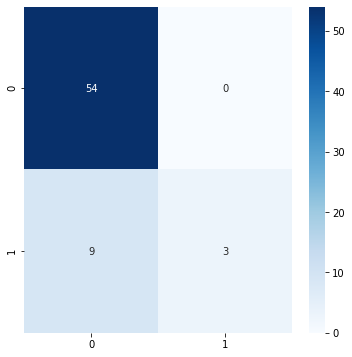

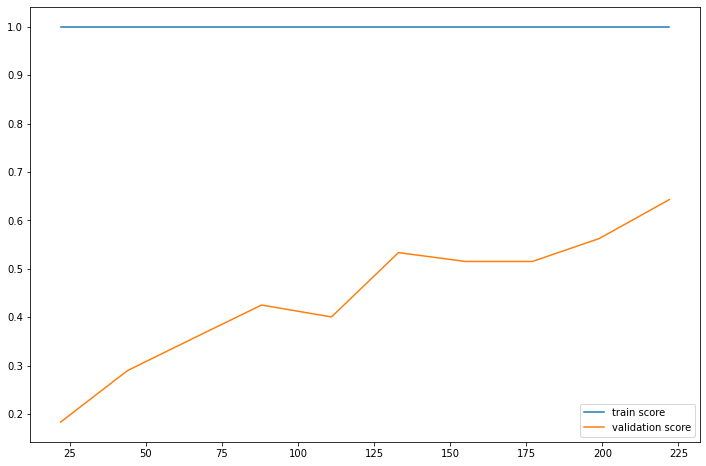

In [207]:
evaluation(model1)

In [76]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [77]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
#CatBoost=make_pipeline(preprocessor,CatBoostClassifier(random_state=0))


In [187]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.67      0.50      0.57        12

    accuracy                           0.86        66
   macro avg       0.78      0.72      0.75        66
weighted avg       0.85      0.86      0.86        66

AdaBoost
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        54
           1       0.62      0.42      0.50        12

    accuracy                           0.85        66
   macro avg       0.75      0.68      0.71        66
weighted avg       0.83      0.85      0.84        66

SVM
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.67      0.33      0.44        12

    accuracy                           0.85        66
   macro avg       0.77      0.65      0.68        66
weighted avg       0.83      0.85      0.83     

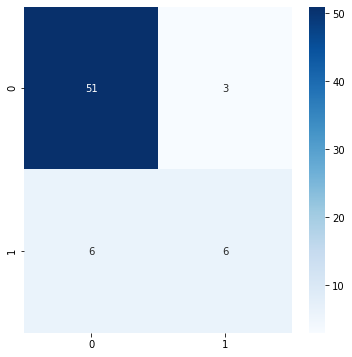

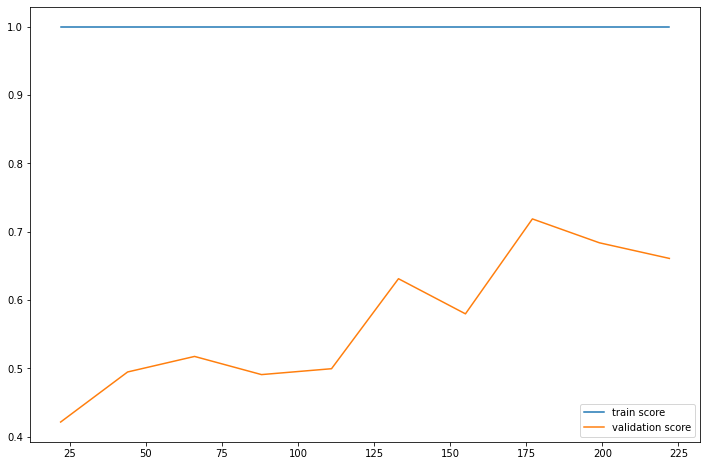

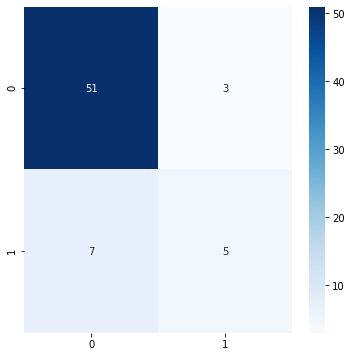

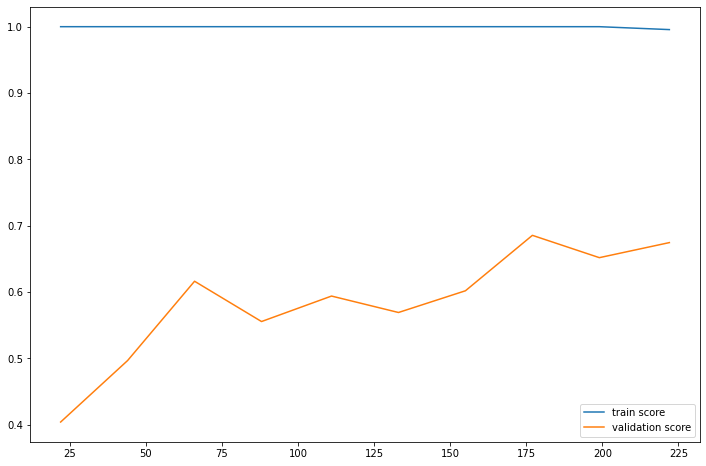

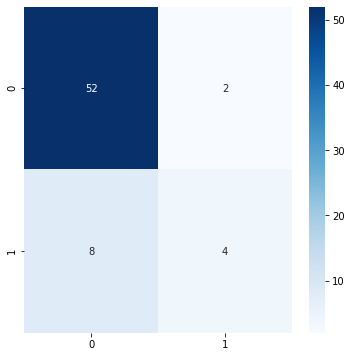

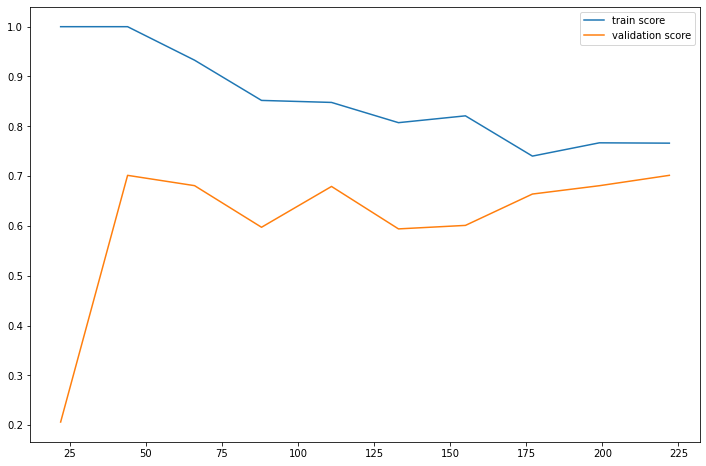

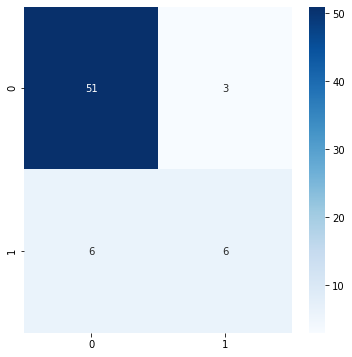

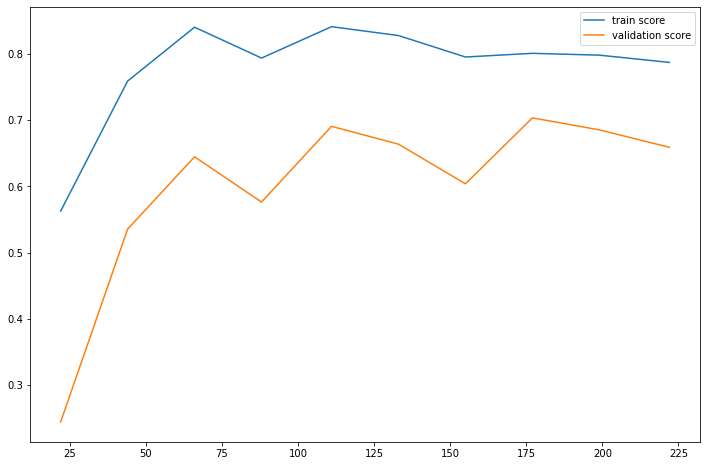

In [196]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Fine Tunning

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [74]:
SVM

NameError: name 'SVM' is not defined

In [78]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [79]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
grid.best_estimator_.score(X_test,y_test,)

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 58, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.75      0.50      0.60        12

    accuracy                           0.88        66
   macro avg       0.82      0.73      0.76        66
weighted avg       0.87      0.88      0.87        66



0.8787878787878788

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.75      0.50      0.60        12

    accuracy                           0.88        66
   macro avg       0.82      0.73      0.76        66
weighted avg       0.87      0.88      0.87        66



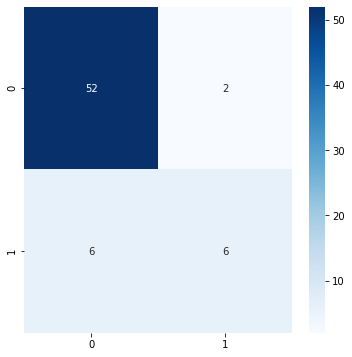

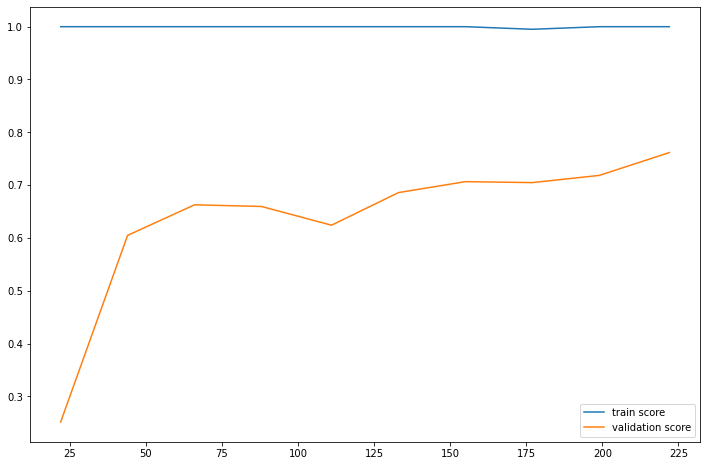

In [202]:
evaluation(grid.best_estimator_)

In [80]:
grid.best_params_

{'svc__gamma': 0.001,
 'svc__C': 1000,
 'pipeline__selectkbest__k': 58,
 'pipeline__polynomialfeatures__degree': 2}

In [60]:
param_grid={
    'criterion':['gini','entropy'],
    'n_estimators':[100,150,200],
    'max_depth':[None,1,3,5,10],
    'min_samples_split':[5,10],
    'min_samples_leaf':[5,10]
}


In [66]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_grid,scoring='recall')
rs_rf.fit(X_train,y_train)
y_pred = rs_rf.predict(X_test)
print(classification_report(y_test, y_pred))
rs_rf.best_estimator_.score(X_test,y_test,)

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        54
           1       1.00      0.17      0.29        12

    accuracy                           0.85        66
   macro avg       0.92      0.58      0.60        66
weighted avg       0.87      0.85      0.80        66



0.8484848484848485

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        54
           1       1.00      0.17      0.29        12

    accuracy                           0.85        66
   macro avg       0.92      0.58      0.60        66
weighted avg       0.87      0.85      0.80        66

[ 22  44  66  88 111 133 155 177 199 222]


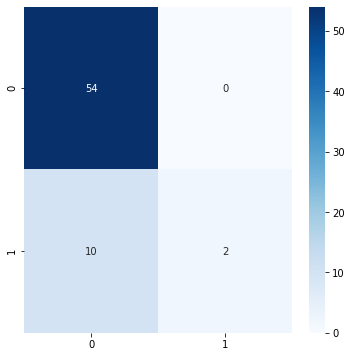

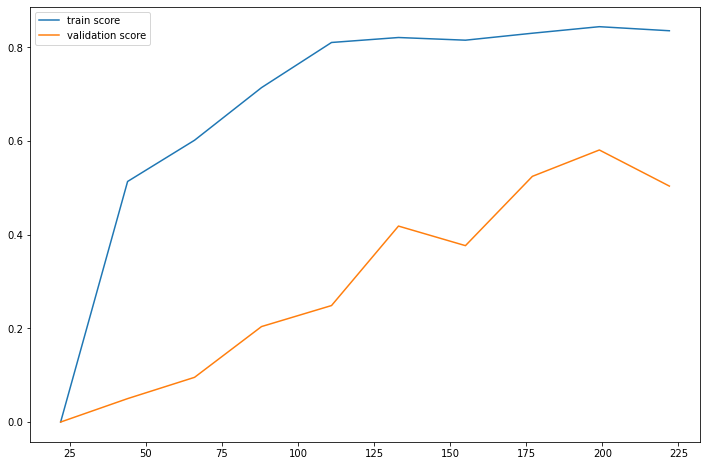

In [67]:
evaluation(rs_rf.best_estimator_)

In [72]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

In [69]:
hp_grid={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5]
}
gs_ab=GridSearchCV(AdaBoostClassifier(),hp_grid,scoring='recall')
gs_ab.fit(X_train,y_train)
y_pred=gs_ab.predict(X_test)
print(classification_report(y_test,y_pred))
gs_ab.best_estimator_.score(X_test,y_test)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.75      0.50      0.60        12

    accuracy                           0.88        66
   macro avg       0.82      0.73      0.76        66
weighted avg       0.87      0.88      0.87        66



0.8787878787878788

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.75      0.50      0.60        12

    accuracy                           0.88        66
   macro avg       0.82      0.73      0.76        66
weighted avg       0.87      0.88      0.87        66

[ 22  44  66  88 111 133 155 177 199 222]


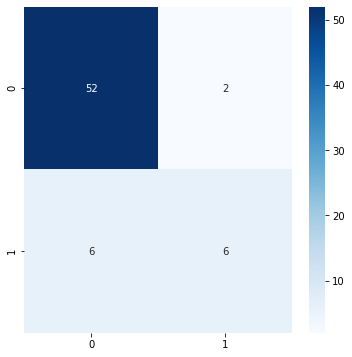

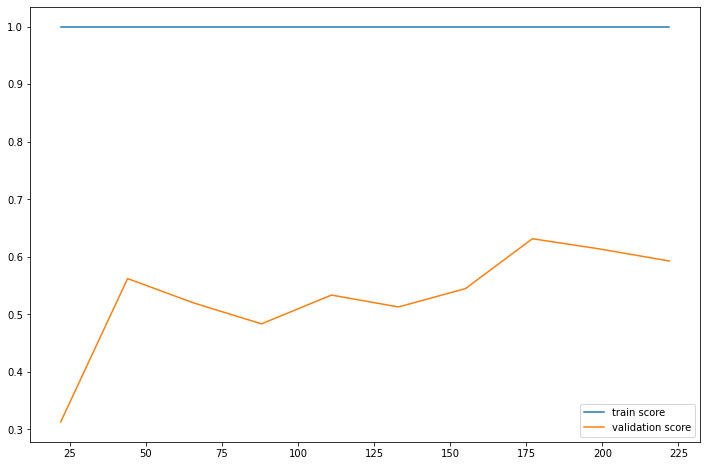

In [70]:
evaluation(gs_ab.best_estimator_)

In [71]:
gs_ab.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

## Precision Recall Curve

In [86]:
from sklearn.metrics import precision_recall_curve

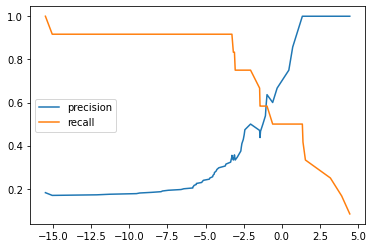

In [97]:

precision, recall, threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))
fig, ax=plt.subplots()
ax.plot(threshold,precision[:-1],label='precision')
ax.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [107]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [114]:
y_pred = final_model(grid.best_estimator_, X_test, threshold=-2.5)
print(f'f1_score= {f1_score(y_test,y_pred)}- recall_score={recall_score(y_test,y_pred)}')

f1_score= 0.5625000000000001- recall_score=0.75


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.32')

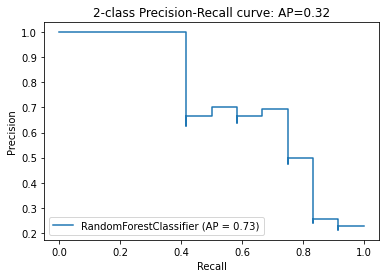

In [115]:
from sklearn.metrics import plot_precision_recall_curve, precision_score,recall_score,average_precision_score
#appropriate for imbalanced datasets which is our case
#precision=precision_score(y_test,rs_rf.predict(X_test))
#recall=recall_score(y_test,rs_rf.predict(X_test))
average_precision=average_precision_score(y_test,rs_rf.best_estimator_.predict(X_test))
disp = plot_precision_recall_curve(rs_rf.best_estimator_, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))